# California Housing Predictions

Using the `/content/sample_data` from Google Colab's basic Jupyter Notebook environment.

Our whole objective is to predict the median house value, in California, this dataset is the base example, is a really famous one, it's a must whenever you're doing Data Science, you'll most likely hear about it, or be recomended Andrew Ng (a genius), and it's famous course.

Housing Pricing Predictions are one of the most common examples for statistic models and linear regression, it's simple and efective. And they can get complicated real fast.

## TL;DR; Warning!! SPOILERS Ahead

The Median House Value is highly determined by the median income of the people already living there, followed by it's location in coordinates vector (longitude and latitude).

## Initialization

Before doing anything we must tweak a couple of parameters

### Imports

In [1]:
import pandas as pd
import numpy as np
THE_ANSWER_TO_ALL_OF_THE_QUESTIONS_IN_THE_UNIVERSE = 42
np.random.seed(THE_ANSWER_TO_ALL_OF_THE_QUESTIONS_IN_THE_UNIVERSE)

Harcoding the seed is not a production best-practice, but it will help a lot in the researching environment, as we'll always get back the same results with the same output, almost guaranteed.

### Configure the environment

In [2]:
DATA_PATH = "/content/sample_data" #@param {type:"string"}

In [3]:
%cd $DATA_PATH

/content/sample_data


### Load the datasets

The training Dataset

In [4]:
df_california_housing_train = pd.read_csv('california_housing_train.csv')
n_rows_california_housing_train = len(df_california_housing_train)
print('Number of training rows', n_rows_california_housing_train)

n_cols_california_housing_train = len(df_california_housing_train.columns)
print('Number of training cols', n_cols_california_housing_train)

Number of training rows 17000
Number of training cols 9


The production dataset

In [5]:
df_california_housing_test = pd.read_csv('california_housing_test.csv')
n_rows_california_housing_test = len(df_california_housing_test)
print('Number of production rows', n_rows_california_housing_test)

n_cols_california_housing_test = len(df_california_housing_test.columns)
print('Number of production cols', n_cols_california_housing_test)

Number of production rows 3000
Number of production cols 9


### Configure our modelling environment values

In [6]:
DEPENDANT_VARIABLE = 'median_house_value' #@param {type:'string'}
INDEPENDANT_VARIABLES = [
  col
  for col in df_california_housing_train.columns
  if col != DEPENDANT_VARIABLE
]

## Exploratory Data Analysis

### Imports

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### What's the percentage of missing values?

Missing values are prone to error, and may determine the considerations we may need to take, maybe drop them, fill them, ignore them.

In some extreme cases, we may have no option but to drastically reduce our dataset

First we explore to analyze just how many `Not Acknowledged` values our dataset has, per column, to have an overview.

Which in this example, we can clearly see that none of the columns have missing values. Great!

In [8]:
df_california_housing_train.isna().sum() / n_rows_california_housing_train

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64

It's always a good practice to evaluate our production dataset, just in case.

In [9]:
df_california_housing_test.isna().sum() / n_rows_california_housing_test

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64

And what about in total? We know that, for this particular example, it's going to be a total of zero, not too many columns, all of them having zero missing values, but if we were to check it out, we'd have to compute all the columns in all of the rows

In [10]:
_ = df_california_housing_test.isna().sum().sum() / (n_rows_california_housing_train * n_cols_california_housing_train)
f'{round(_ * 100, 2)}%'

'0.0%'

### What's in the dataset?

The head and tails

In [11]:
display(
  '',
  'Training Dataset\'s Head',
  '',
  df_california_housing_train.head(),
  '',
  'Training Dataset\'s Tail',
  '',
  df_california_housing_train.tail(),
)

''

"Training Dataset's Head"

''

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

''

"Training Dataset's Tail"

''

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0

In [12]:
display(
  '',
  'Training Dataset\'s Head',
  '',
  df_california_housing_test.head(),
  '',
  'Training Dataset\'s Tail',
  '',
  df_california_housing_test.tail(),
)

''

"Training Dataset's Head"

''

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

''

"Training Dataset's Tail"

''

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value  
2995      1258.0       607.0         1.1790            225000.0  
2996      3496.0      1036.0         3.3906            237200.0  
2997       693.0       220.0         2.2895             62000.0  
2998        46.0        14.0         3.2708            162500.0  
2999       753.0       260.0         8.5608            500001.0

### What are the types of the values?

Usually, we may encounter string values, boolean, values that are not number, values that, at the end of the day, are harder for the machine to properly compute and understand.

That's not something we encounter in the given Dataset

All of the training values are float, which is what we want

In [13]:
df_california_housing_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

All of the production values are float, just as the training values, meaning they are, maybe not perfect, but at least ready

In [14]:
df_california_housing_test.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

### What are some statistic values?

We can see that nothing's too off from normal, if there were to be some abnormal values, this would be the time to change that.

Even though nothing's too off, `total_rooms` and `total_bedrooms` have and standard deviation that's way too high for the given context, that'd be something to take into consideration before training

In [15]:
df_california_housing_train.describe().transpose()

count           mean            std         min  \
longitude           17000.0    -119.562108       2.005166   -124.3500   
latitude            17000.0      35.625225       2.137340     32.5400   
housing_median_age  17000.0      28.589353      12.586937      1.0000   
total_rooms         17000.0    2643.664412    2179.947071      2.0000   
total_bedrooms      17000.0     539.410824     421.499452      1.0000   
population          17000.0    1429.573941    1147.852959      3.0000   
households          17000.0     501.221941     384.520841      1.0000   
median_income       17000.0       3.883578       1.908157      0.4999   
median_house_value  17000.0  207300.912353  115983.764387  14999.0000   

                              25%          50%         75%          max  
longitude             -121.790000    -118.4900    -118.000    -114.3100  
latitude                33.930000      34.2500      37.720      41.9500  
housing_median_age      18.000000      29.0000      37.000      52.0000  
total_rooms           1462.000000    2127.0000    3151.250   37937.0000  
total_bedrooms         297.000000     434.0000     648.250    6445.0000  
population             790.000000    1167.0000    1721.000   35682.0000  
households             282.000000     409.0000     605.250    6082.0000  
median_income            2.566375       3.5446       4.767      15.0001  
median_house_value  119400.000000  180400.0000  265000.000  500001.0000

And an overall view of missing values, and the data types, it really gives a quick view into some important details such as:

- Types
- Missing Values
- Columns and their names
- Rows

In [16]:
df_california_housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


### Explore the abornal values, or strange

First, let's prepare a helper function to allows us for an easier exploration

In [17]:
def explore_threshhold(
  df: pd.DataFrame,
  col: str,
  start_at: int
) -> pd.DataFrame:
  return df[ df[col] >= start_at ]

The `total_bedrooms` was one of the fields that caught my attention

In [18]:
def explore_total_bedrooms(
  total_bedrooms: int
) -> pd.DataFrame:
  return explore_threshhold(
    df_california_housing_train,
    'total_bedrooms',
    total_bedrooms,
  )

steps = [
  500,
  1_000,
  1_500,
  2_000,
  5_000,
]

for total_bedrooms in steps:
  exploration_result = explore_total_bedrooms(total_bedrooms)
  exploration_rows = len(exploration_result)
  print(f'Total number of {total_bedrooms} rows with more than {exploration_rows} total_bedrooms')

Total number of 500 rows with more than 6866 total_bedrooms
Total number of 1000 rows with more than 1577 total_bedrooms
Total number of 1500 rows with more than 563 total_bedrooms
Total number of 2000 rows with more than 234 total_bedrooms
Total number of 5000 rows with more than 3 total_bedrooms


To put the output into perspective, the maximum amount of total_bedrooms was `6445`, the standard deviation was that of `421`, meaning, most, if not almost all of the rows have around 500 or lower total_bedrooms, we don't want those with more than `1_000` bedrooms, as it will just add noise

The `total_rooms` was another suspicious field

In [19]:
def explore_total_rooms(
  total_rooms: int
) -> pd.DataFrame:
  return explore_threshhold(
    df_california_housing_train,
    'total_rooms',
    total_rooms,
  )

steps = [
  1_000,
  1_500,
  2_000,
  5_000,
  7_500,
  10_000,
]

for total_rooms in steps:
  exploration_result = explore_total_rooms(total_rooms)
  exploration_rows = len(exploration_result)
  print(f'Total number of {total_rooms} rows with more than {exploration_rows} total_rooms')

Total number of 1000 rows with more than 15119 total_rooms
Total number of 1500 rows with more than 12484 total_rooms
Total number of 2000 rows with more than 9249 total_rooms
Total number of 5000 rows with more than 1455 total_rooms
Total number of 7500 rows with more than 531 total_rooms
Total number of 10000 rows with more than 240 total_rooms


Now is a little bit different, because there's some variability, but here the spike was a little bit clearer, with an standard deviation of `2180` the we can't that much over, outliers are necessary, but that many will just fill with noise our dataset. A good number may be `7_500`

### Visualizations and plotting

Visualizing is a must in Data Science, we can't just be applying algorithms and selecting features at random, we must first evaluate, deeply evaluate how's the data that we'll be working with composed.

We could even be able to detect some patterns or problems

#### Outliers

Outliers are values that our way above our main values, wherever most of the values are, these ones escape that range, too many may fill our data with noise, but outliers are nice because they prepare our models for the real world. Which is exactly what we want, an adaptable model that's trained with real data

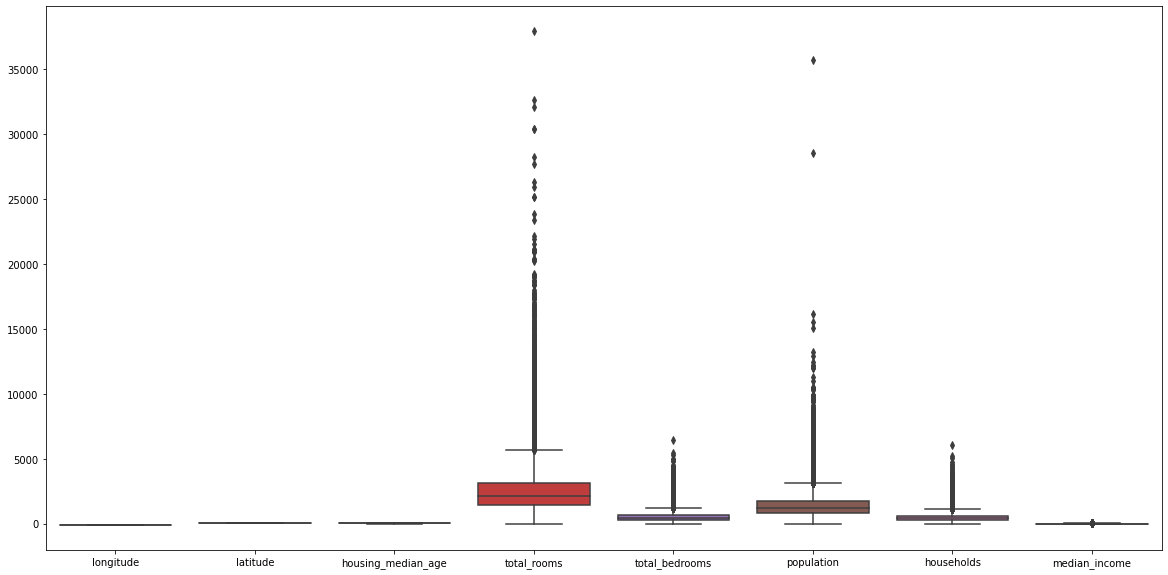

In [20]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_california_housing_train[INDEPENDANT_VARIABLES])

#### Correlation

It helps us identify if there's some sort of dependency, or influence, between pairs of values, a column will always have 100% of dependency with itself, but when two values get too close to 1 or -1, that means that they are representing almost exactly the same information, and one of the two pairs should dissappear.

Above >= 0.5 it's recomended. But at times, if we don't have enough data, it may not be worth it, or when we're evaluating vectors, such as:

- Location coordinates
- Date
- Time
- Force

Then it will obviously have some sort of high correlation, which is expected

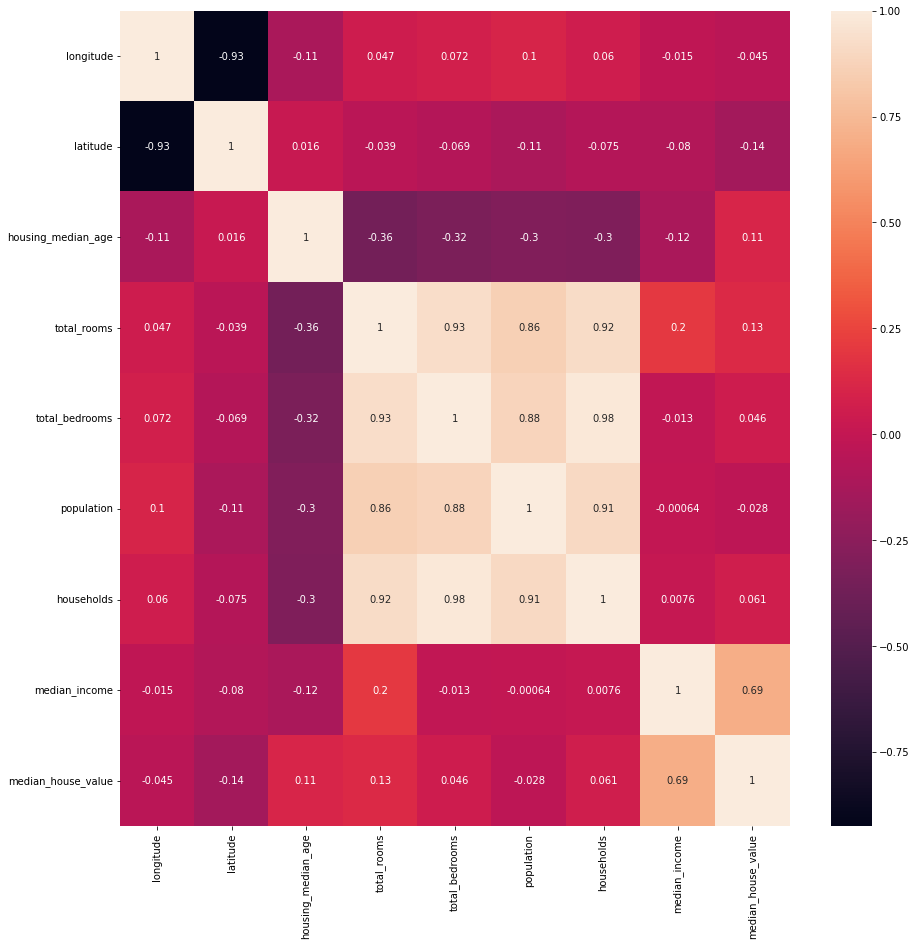

In [773]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_california_housing_train.corr(method='pearson'), fmt='.2g', annot=True)

Of the given values, `households` is one with high, not to say almost identical, correlation with population, total_rooms and total_bedrooms

#### Distribution of the data

We can just plot all of the values into a grid of subplots to see if there's some unbalancement, which we're prone to have given the size of the dataset.

And the fact that we're working with outliers, plus the context we're in, to some degree, it may be nice to keep the unbalancement

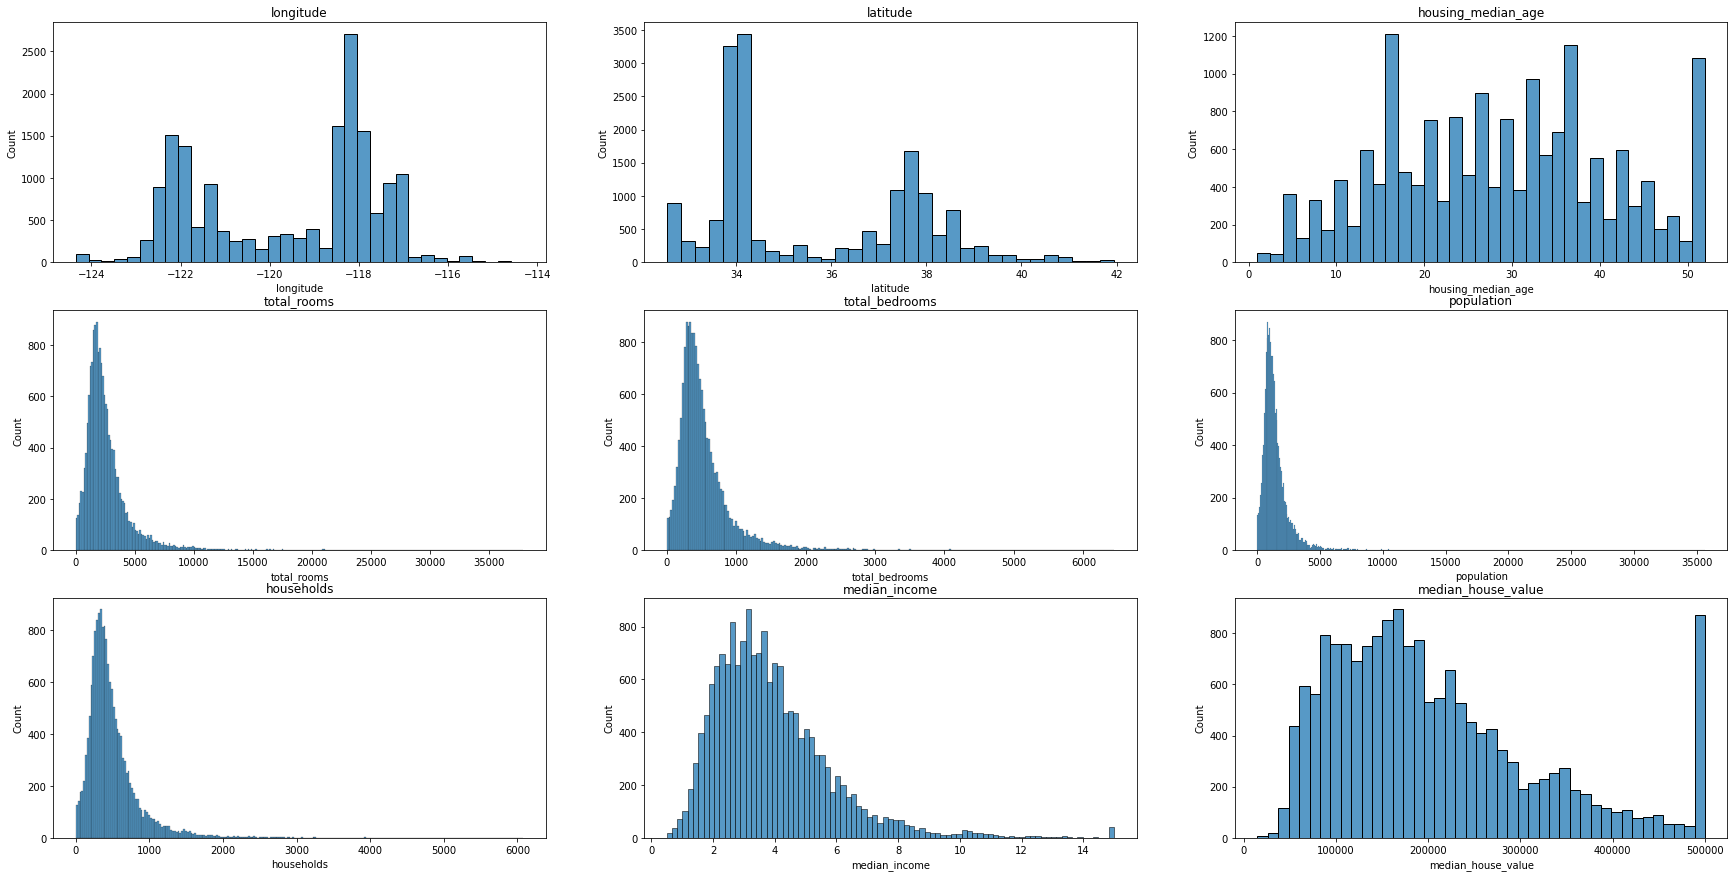

In [22]:
from math import ceil, floor

df_boxplot_distribution = df_california_housing_train.select_dtypes(include='number')

# columns to use
df_cols = df_boxplot_distribution.columns

# total subplots
n_plot_cols = 3
n_plot_rows = ceil(len(df_cols) / n_plot_cols)

# plot size
subplot_width_in_units = 10
subplot_height_in_units = 5
plot_figsize = (
  subplot_width_in_units * n_plot_cols,
  subplot_height_in_units * n_plot_rows,
)

# subplots
fig, ax = plt.subplots( n_plot_rows, n_plot_cols, figsize=plot_figsize )

for index, col in enumerate(df_cols):
  subplot_ax = ax[
    int(index / n_plot_cols),
    int(index % n_plot_cols),
  ]
  subplot_ax.set_title(col)

  sns.histplot(
    data=df_boxplot_distribution,
    x=col,
    ax=subplot_ax,
  )

Boxplot will help us visualize some basic statistics about each column

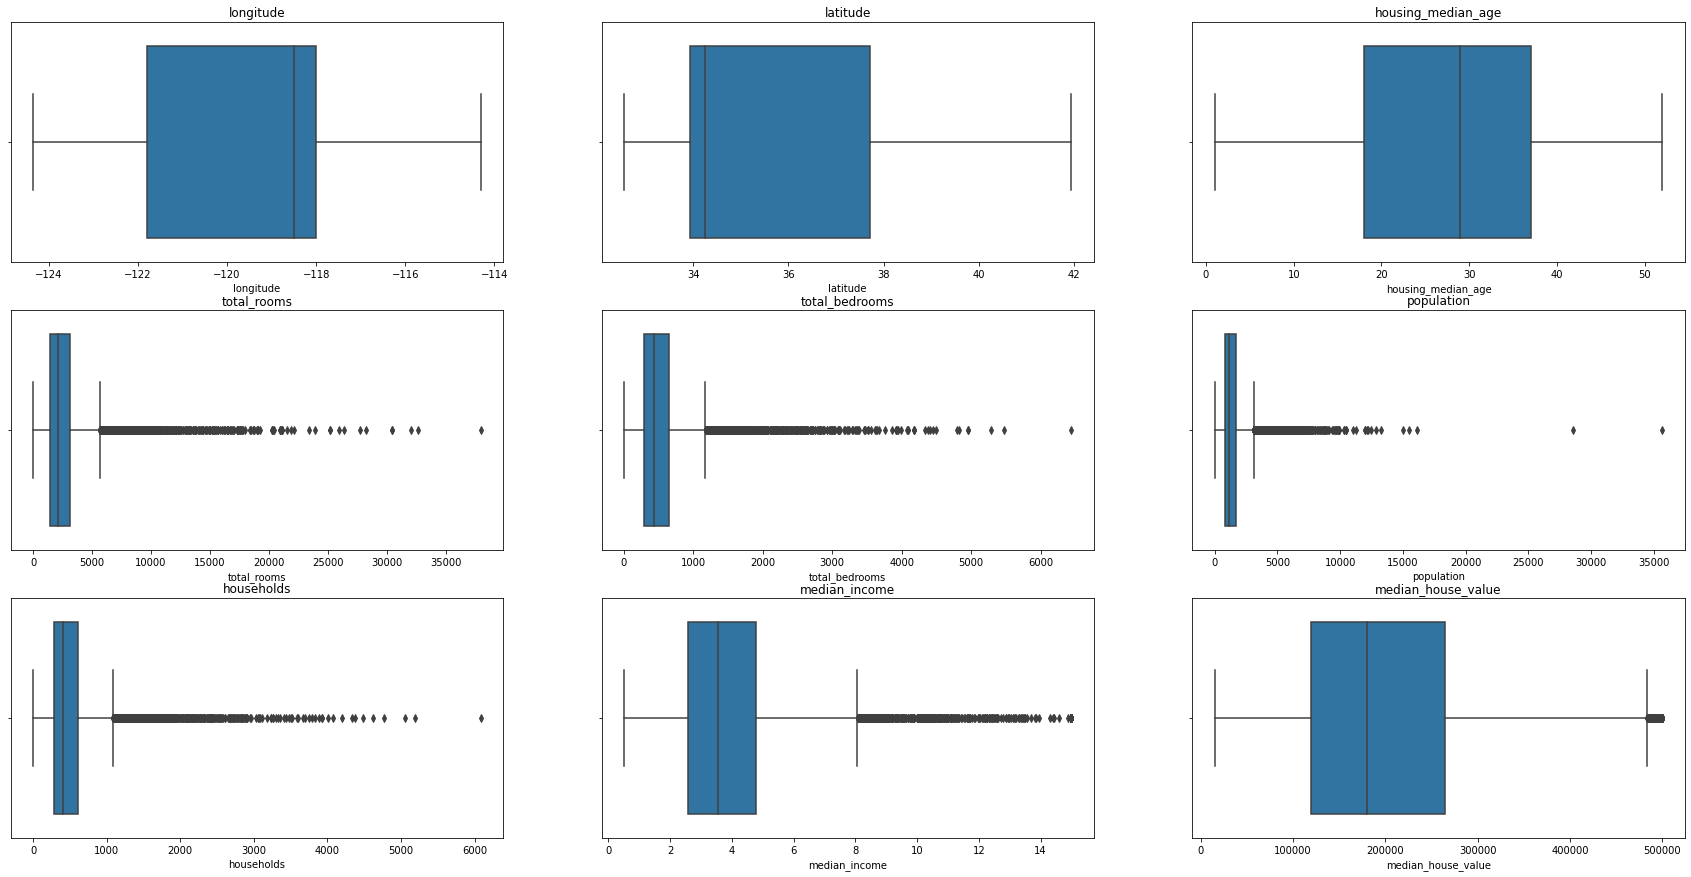

In [23]:
from math import ceil, floor

df_boxplot_distribution = df_california_housing_train.select_dtypes(include='number')

# columns to use
df_cols = df_boxplot_distribution.columns

# total subplots
n_plot_cols = 3
n_plot_rows = ceil(len(df_cols) / n_plot_cols)

# plot size
subplot_width_in_units = 10
subplot_height_in_units = 5
plot_figsize = (
  subplot_width_in_units * n_plot_cols,
  subplot_height_in_units * n_plot_rows,
)

# subplots
fig, ax = plt.subplots( n_plot_rows, n_plot_cols, figsize=plot_figsize )

for index, col in enumerate(df_cols):
  subplot_ax = ax[
    int(index / n_plot_cols),
    int(index % n_plot_cols),
  ]
  subplot_ax.set_title(col)

  sns.boxplot(
    data=df_boxplot_distribution,
    x=col,
    ax=subplot_ax,
  )

We can see that the ones that were highly undistributed, or with a big unbalancement issue, are the ones that happend to have the most amount of outliers, but outliers are useful, and necessary, they are representing the real information that we're trying to adapt to.

### What are we trying to predict?

We're trying to predict the `median_house_value` but how do we know, exactly, which algorithm we should apply? "Simple" at times, we plot it, it will reveal the shape of what we're trying to predict.

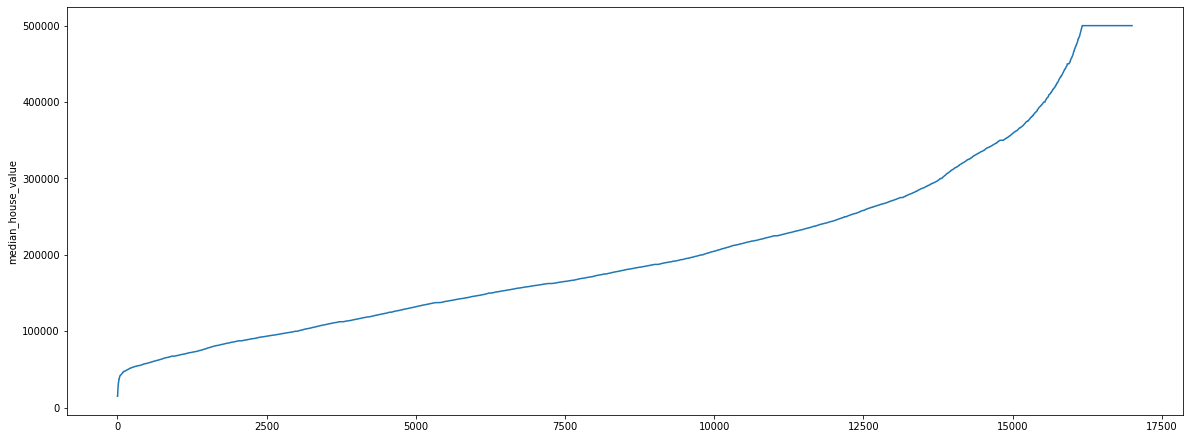

In [24]:
target_values = df_california_housing_train[ DEPENDANT_VARIABLE ]
sorted_target_values = target_values.sort_values(
  ascending=True,
  ignore_index=True,
)

plt.figure(figsize=(20, 7.5))
_ = sns.lineplot(
  x=sorted_target_values.index,
  y=sorted_target_values
)

It's a polynomial, thus, linear regression with a Polynomial feature may be our best option while using supervised learning.

Or we could simply slice and analyze the dataset (sorted by the dependant value) and get our examples from the very beginning, but not zero, up to `12_500` which is were it starts adding degrees, that'd be another option

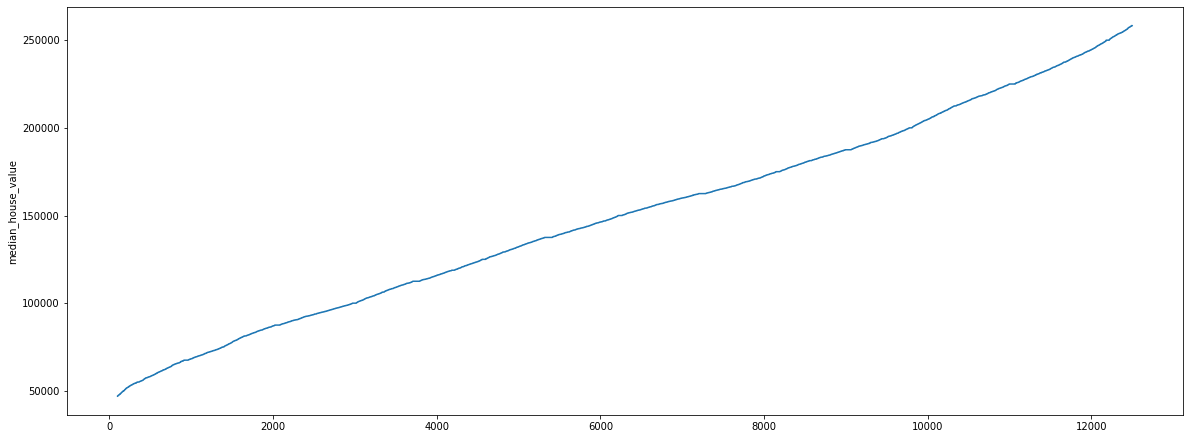

In [25]:
temp_df = sorted_target_values[100:12_500]

plt.figure(figsize=(20, 7.5))
_ = sns.lineplot(
  x=temp_df.index,
  y=temp_df
)

Which means we'd also have to it on the test set, because our model wouldn't be working for all case scenarios, just a few, which may be fine given a context

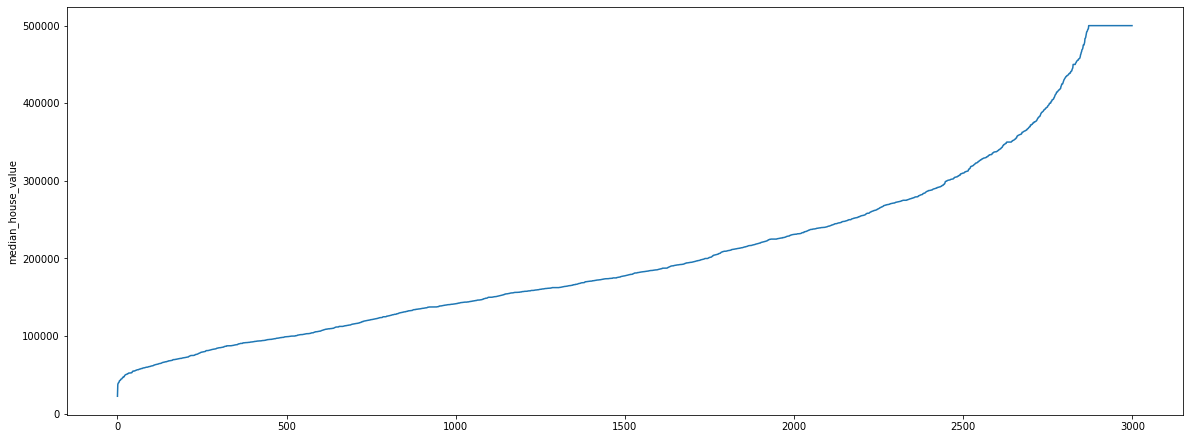

In [26]:
target_test_values = df_california_housing_test[ DEPENDANT_VARIABLE ]
sorted_target_test_values = target_test_values.sort_values(
  ascending=True,
  ignore_index=True,
)

plt.figure(figsize=(20, 7.5))
_ = sns.lineplot(
  x=sorted_target_test_values.index,
  y=sorted_target_test_values
)

The start would have the same problem, it is just that now we'd have to cut it at, let's say, `2_500` just to have a nice, almost, or at least really close, sort of line

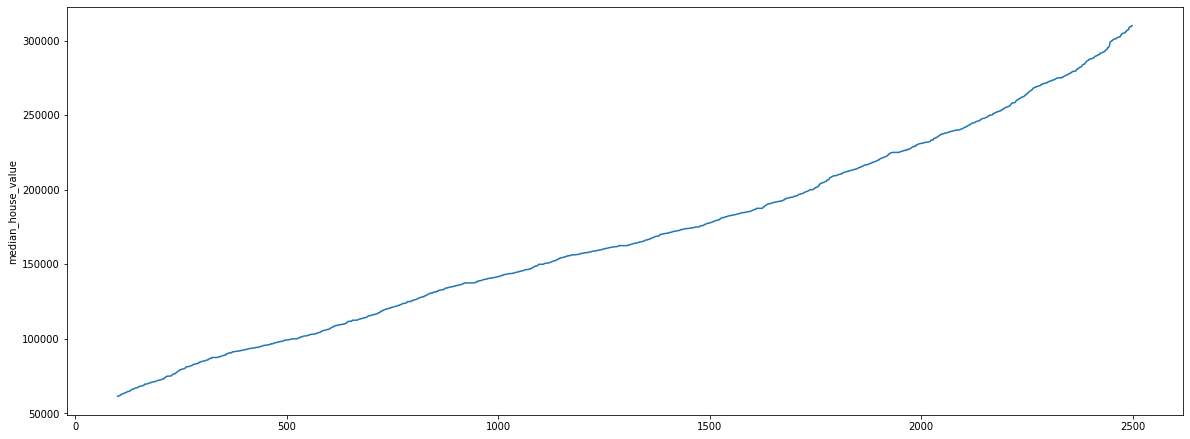

In [27]:
temp_df = sorted_target_test_values[100:2_500]

plt.figure(figsize=(20, 7.5))
_ = sns.lineplot(
  x=temp_df.index,
  y=temp_df
)

## Data Preparation

### Backup

We won't be modifying the original dataset, instead we'll be working on a copy

In [28]:
df_train = df_california_housing_train.copy()
df_test = df_california_housing_test.copy()

### Highly correlated values

Let's select the values that are too correlated

In [29]:
too_highly_correlated_cols = [
  # 'households',
  'total_rooms',
  'population',
  # 'latitude',
  # 'median_income',
]

And remove them

In [30]:
# df_train = df_train.drop(columns=too_highly_correlated_cols)
# df_test = df_test.drop(columns=too_highly_correlated_cols)

Let's see the correlation plot now to see how it changed

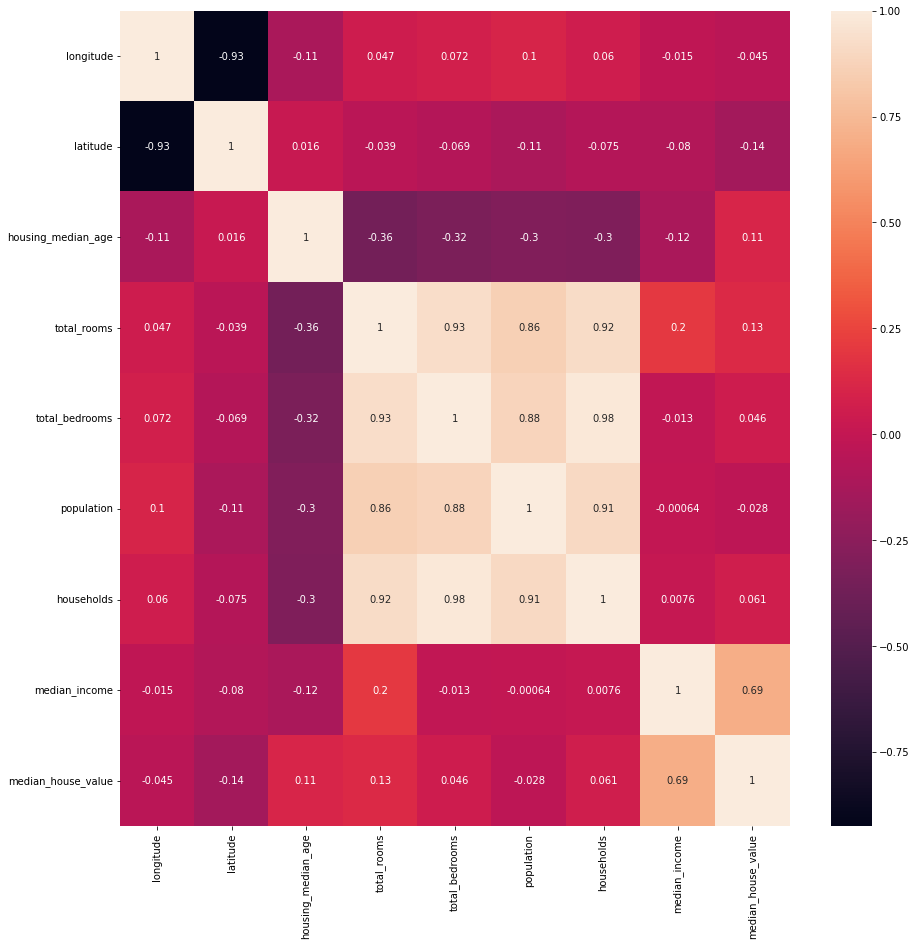

In [759]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_train.corr(method='pearson'), fmt='.2g', annot=True)

It stays the same, just because we don't have enough features, nor do they have, almost all of them, enough importance to stand on their, thus, we need to use highly correlated values

### Cleansening

We clean all the columns as we already explained

In [32]:
# df_train = df_train[ df_train['total_bedrooms'] <= 1_000 ]
# df_train = df_train[ df_train['total_rooms'] <= 7_500 ]

### Unbalancement

Having a weird distribution, or unbalanced, is prone to errors, by definition, unless you're working with that in mind, or models that acknowledged and take into account that unbalancement, in which case, you'd be most likely fine.

Source: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

For that, we'd use an undersampler technique, in the data splitting section, if we were to be working with classification, which is not the case

In [33]:
from imblearn.under_sampling import RandomUnderSampler

def undersample(
  X: pd.DataFrame,
  y: pd.DataFrame,
) -> tuple:
  undersampler = RandomUnderSampler(sampling_strategy='majority')
  return undersampler.fit_resample(X, y)

X_undersampled, y_undersampled = undersample(df_train[INDEPENDANT_VARIABLES], df_train[DEPENDANT_VARIABLE])
y_undersampled

0         14999.0
1         14999.0
2         14999.0
3         14999.0
4         17500.0
           ...   
16182    500000.0
16183    500000.0
16184    500000.0
16185    500000.0
16186    500001.0
Name: median_house_value, Length: 16187, dtype: float64

If we plot now the distribution

### Standarization

As previously explained, there's no need to standarize the data in our working dataset, as it's all ready to exploit

### Normalization

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

We extract our statistical values, the ones we'll need

In [35]:
df_mean = df_train.mean()
df_std = df_train.std()
df_min = df_train.min()
df_max = df_train.max()

Min Max normalization

In [36]:
df_normalized_train = (df_train - df_min) / (df_max - df_min)
df_normalized_test = (df_test - df_min) / (df_max - df_min)

Or using a library

In [37]:
scaler = MinMaxScaler()

df_normalized_train = pd.DataFrame(
  scaler.fit_transform(df_train),
  columns=scaler.feature_names_in_
)
df_normalized_test = pd.DataFrame(
  scaler.fit_transform(df_test),
  columns=scaler.feature_names_in_
)

And it's visualization

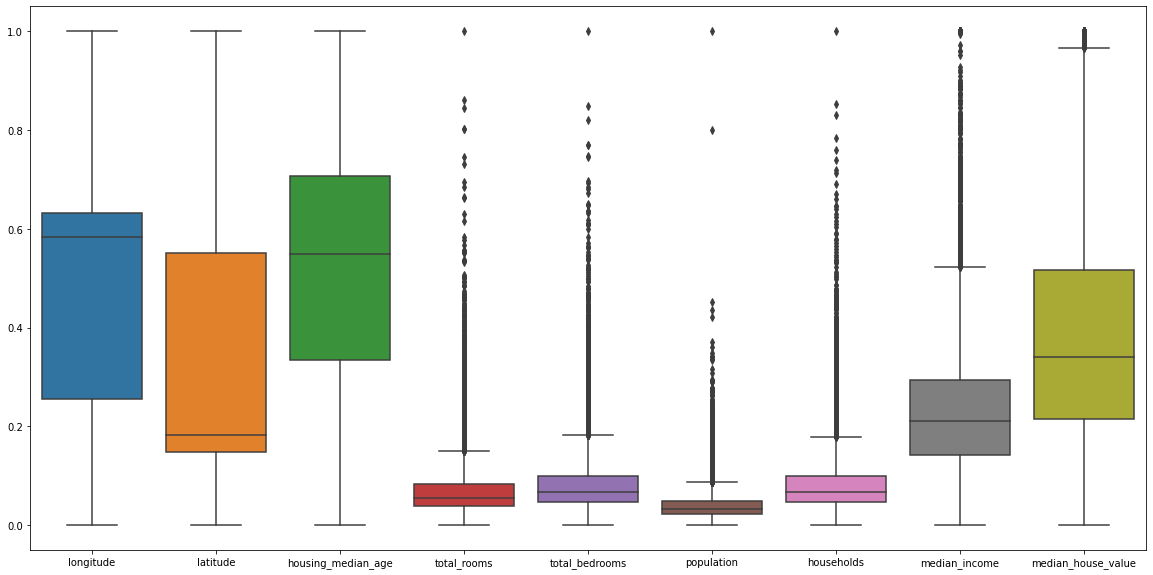

In [38]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_normalized_train)

Standard normalization

In [39]:
df_normalized_train = (df_train - df_mean) / df_std
df_normalized_test = (df_test - df_mean) / df_std

Or using a library

In [40]:
scaler = StandardScaler()

df_normalized_train = pd.DataFrame(
  scaler.fit_transform(df_train),
  columns=scaler.feature_names_in_
)
df_normalized_test = pd.DataFrame(
  scaler.fit_transform(df_test),
  columns=scaler.feature_names_in_
)

And it's visualization

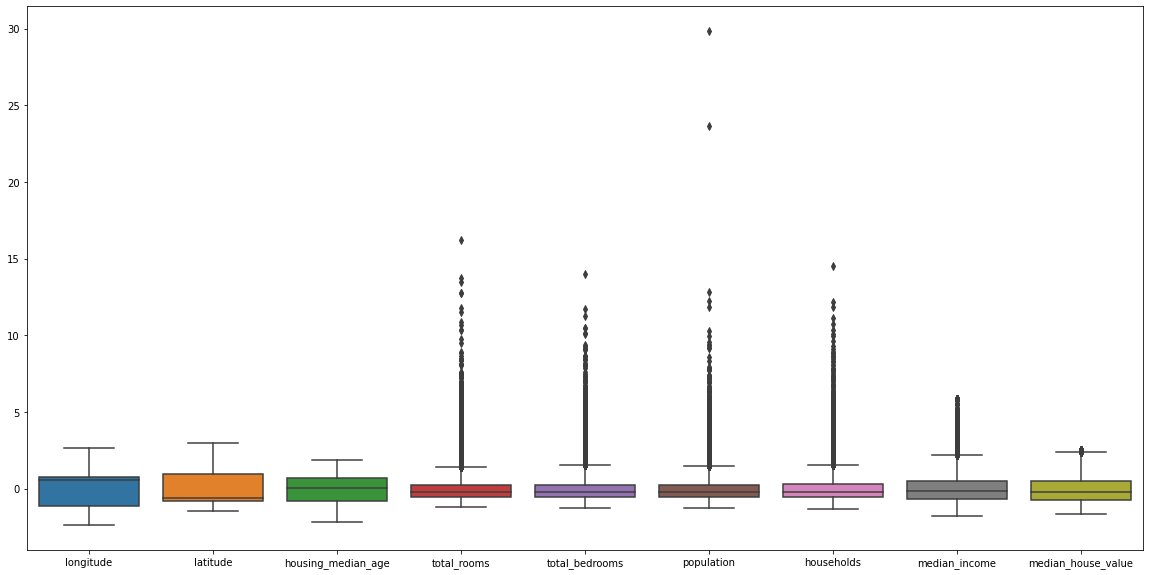

In [41]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_normalized_train)

Given the amount of outliers in our Dataset, we must use MinMax to preserve them, because that's a really valuable information

In [42]:
df_normalized_train = (df_train - df_min) / (df_max - df_min)
df_normalized_test = (df_test - df_min) / (df_max - df_min)

## Exploratory Data Analysis, after normalization

When all the values are between 0 and 1, we can more easily evaluate it's patterns and proportions. Thus, a second exploratory data analysis is a good option

The overall view including the outliers

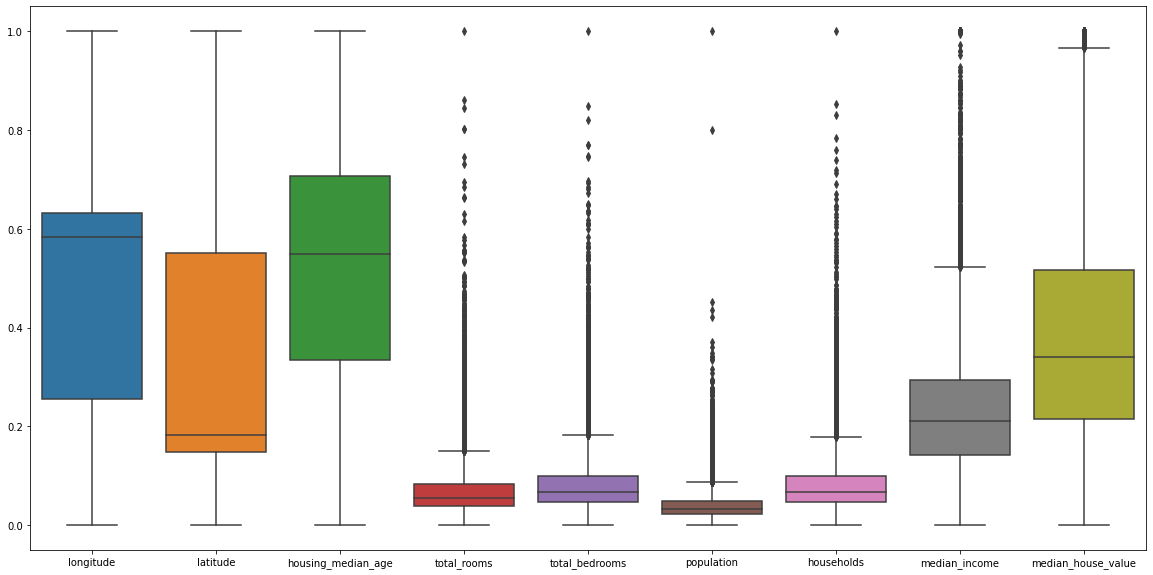

In [43]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_normalized_train)

Now we plot the correlation

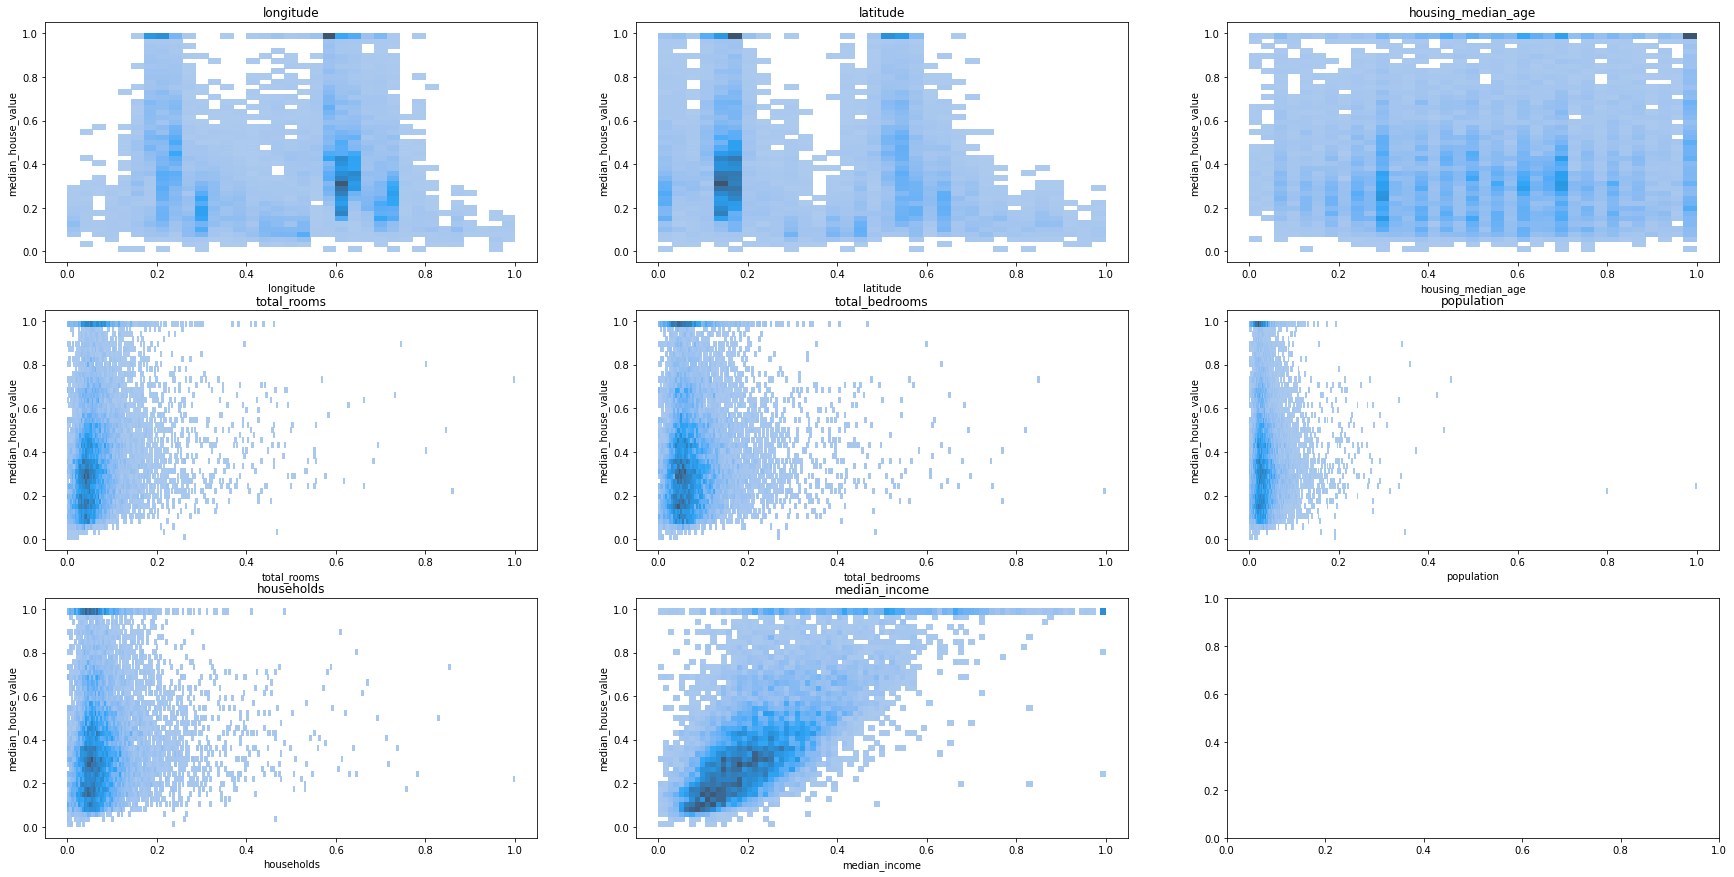

In [44]:
from math import ceil, floor

# columns to use
df_cols = [ col for col in df_normalized_train.columns if col != DEPENDANT_VARIABLE ]

# total subplots
n_plot_cols = 3
n_plot_rows = ceil(len(df_cols) / n_plot_cols)

# plot size
subplot_width_in_units = 10
subplot_height_in_units = 5
plot_figsize = (
  subplot_width_in_units * n_plot_cols,
  subplot_height_in_units * n_plot_rows,
)

# subplots
fig, ax = plt.subplots( n_plot_rows, n_plot_cols, figsize=plot_figsize )

for index, col in enumerate(df_cols):
  subplot_ax = ax[
    int(index / n_plot_cols),
    int(index % n_plot_cols),
  ]
  subplot_ax.set_title(col)

  # sns.scatterplot(
  sns.histplot(
  # sns.barplot(
    data=df_normalized_train,
    x=col,
    y=DEPENDANT_VARIABLE,
    ax=subplot_ax
  )

And this plot, it's just really cool somehow

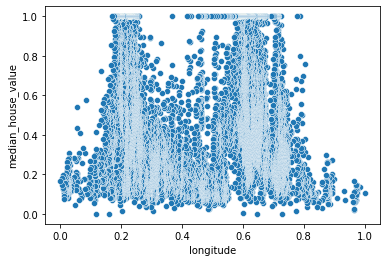

In [45]:
sns.scatterplot( data=df_normalized_train, x='longitude', y=DEPENDANT_VARIABLE )

The position, as expected, does not have a linear correlation, but it does show some really intresting results, there are coordinates where the median house pricing value rises, proving it's correlation to a certain degree

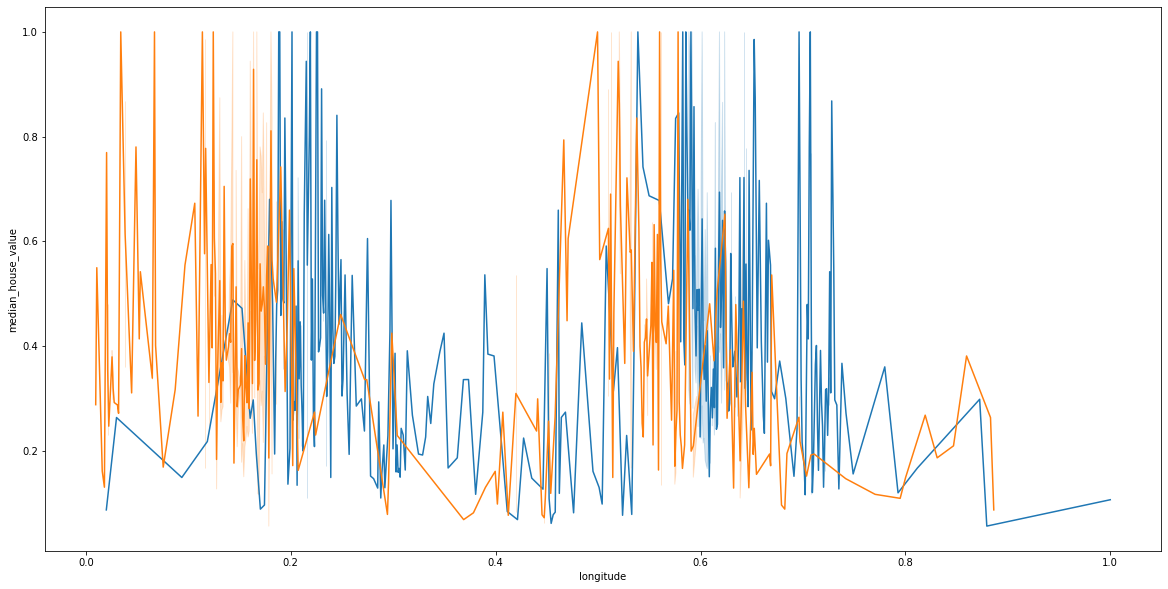

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot( data=df_normalized_train[::50], x='longitude', y=DEPENDANT_VARIABLE )
sns.lineplot( data=df_normalized_train[::50], x='latitude', y=DEPENDANT_VARIABLE )

## Modelling

We're trying to predict the value of a house, the `median_house_value` is our dependant variable, which means that it's the one influenced by the independant variables.

The value we want to predict is a numeric, continue value, that means, it's a value not enclosed in a given group, that can take any number, from infinity to infinity, in that range we'll fit our aproximation (prediction). Thus, no matter what model or technique we use, it'll end up being some sort of Regression, the most common one, and simple, being the Linear Regression.

### Imports

In [47]:
from sklearn.model_selection import train_test_split

First we must update the cols constants with the new columns that we have after all our prepration (we removed a few)

In [48]:
DEPENDANT_VARIABLE = 'median_house_value' #@param {type:'string'}
INDEPENDANT_VARIABLES = [
  col
  for col in df_train.columns
  if col != DEPENDANT_VARIABLE
]

### Data splitting

We'll usually have to make use of the `sklearn.model_selection.train_test_split` utility, but in the given case, it's already splitted, so we'll just have to extract the dependant variable

Training dataset

In [361]:
temp_df = df_normalized_train.sort_values(
  by=DEPENDANT_VARIABLE,
  ascending=True,
  # ignore_index=True
# )[100:12_500]
)[100:]
# )[200:]
# temp_df = temp_df[ temp_df[DEPENDANT_VARIABLE] < 1.0 ] # There are too many values on 1.0
accepted_indeces = list(temp_df.index)
# accepted_indeces = list(df_normalized_train.index)

X_train = df_normalized_train.iloc[ accepted_indeces ][ INDEPENDANT_VARIABLES ]
y_train = df_normalized_train.iloc[ accepted_indeces ][ DEPENDANT_VARIABLE ]

Production dataset

In [362]:
temp_df = df_normalized_test.sort_values(
  by=DEPENDANT_VARIABLE,
  ascending=True,
  # ignore_index=True
# )[100:2_500]
)[100:]
# )[200:]
# temp_df = temp_df[ temp_df[DEPENDANT_VARIABLE] < 1.0 ] # There are too many values on 1.0
accepted_indeces = list(temp_df.index)
# accepted_indeces = list(df_normalized_test.index)

X_test = df_normalized_test.iloc[ accepted_indeces ][ INDEPENDANT_VARIABLES ]
y_test = df_normalized_test.iloc[ accepted_indeces ][ DEPENDANT_VARIABLE ]

### Helpers

This function will help us format our score to only display two decimals, and be more easibly understandable to humans, such as ourselves :)

In [363]:
def format_score(
  score: float
) -> str:
  return f'{round(score * 100, 2)}%'

Since `scikit-learn` provides and API layer with the same entrypoints we can build a helper layer to help us call a model, train it, and retrieve it's score

In [364]:
def train_sklearn_model(
  model,
  X_train: pd.DataFrame,
  y_train: pd.DataFrame,
  X_test: pd.DataFrame,
  y_test: pd.DataFrame,
) -> str:
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  formatted_score = format_score(score)

  return formatted_score

And we'll also need a way to visualize our linear regression, even though it may be closer to a polynomial, a linear regression is an easier way to visualize and understand how well our model is doing.

For that we'll just compare the predicted values with the actual ones. And using a function, we can just tweak a couple of parameters to have just what we need. But we'll need this function to compute right after we've splitted the data, otherwise, it won't work with our `y_true` default param value.

I'll be using the following reference:

https://stackoverflow.com/questions/59829077/how-to-display-r-squared-value-on-my-graph-in-python

In [711]:
# from sklearn.metrics import RocCurveDisplay

def plot_regression(
  model,
  base_model: callable,
  y_true: pd.Series = y_test,
  y_lim_min: float = 0.0,
  y_lim_max: float = 1.0,
  X_true: pd.DataFrame = X_test
) -> None:
  plt.figure(figsize=(20, 10))
  y_pred = model.predict(X_true)
  plt.scatter(
    y_true,
    y_pred,
    color='blue',
    alpha=0.2,
  )
  # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')

  # squared error
  root_squared_error = r2_score(y_true, y_pred)

  shift = .1
  # shift = 0

  # annotation
  ann_x, ann_y = (0 + shift, 1 - shift)
  plt.annotate(
    'r-squared = {:.3f}'.format(root_squared_error),
    (ann_x, ann_y)
  )

  # limit the window view
  plt.ylim(y_lim_min, y_lim_max)

  #regression line
  y_true, y_pred = np.array(y_true).reshape(-1,1), y_pred.reshape(-1,1)
  plt.plot(y_true, base_model().fit(y_true, y_pred).predict(y_true), linewidth=4, color='red')

  # display de plot
  plt.show()

### PCA

Principal Component Analysis is a powerful technique for feature reduction, which are a group of techniques focused or preserving the most amount of information in the least number of features by creating hypervalues.

PCA helps us conserve the most important information, attempting to find uncorrelated values, while ICA tries to find the independent variables

**Source**: https://www.quora.com/What-is-the-difference-between-PCA-and-ICA

In [366]:
from sklearn.decomposition import PCA

To decide which value, or number to say, of components should the PCA take, we must plot it's evolution

In [367]:
pca_explainability = list()

for n_components in range(1, len(INDEPENDANT_VARIABLES) + 1):
  # svd_solver = 'full' if n_components <= 5 else 'arpack'
  svd_solver = 'auto'
  model = PCA(n_components=n_components, svd_solver=svd_solver)

  model.fit(X_train, y_train)
  explainability = model.explained_variance_

  pca_explainability.append({
    'n_components': n_components,
    'explainability': explainability.sum(),
  })

pca_explainability

[{'explainability': 0.08896696788359382, 'n_components': 1},
 {'explainability': 0.15123485346446552, 'n_components': 2},
 {'explainability': 0.1685773575022282, 'n_components': 3},
 {'explainability': 0.1790103162280171, 'n_components': 4},
 {'explainability': 0.18176318089574184, 'n_components': 5},
 {'explainability': 0.18198236048598856, 'n_components': 6},
 {'explainability': 0.18217161899664247, 'n_components': 7},
 {'explainability': 0.18222637951061402, 'n_components': 8}]

With a barplot

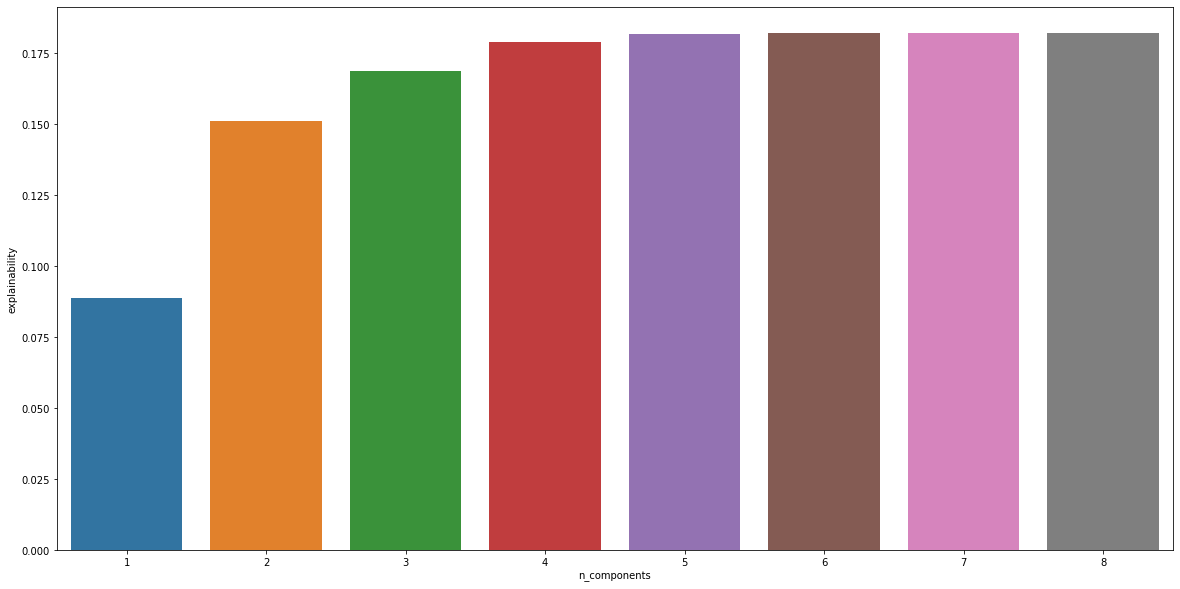

In [368]:
plt.figure(figsize=(20,10))
_ = sns.barplot(
  data=pd.DataFrame(pca_explainability),
  x='n_components',
  y='explainability',
  # discrete=True,
)

Even though it's supposed to be better with a lineplot, but, using the elbow method, we can "easily" determine the middleground between number of components and it's explainability

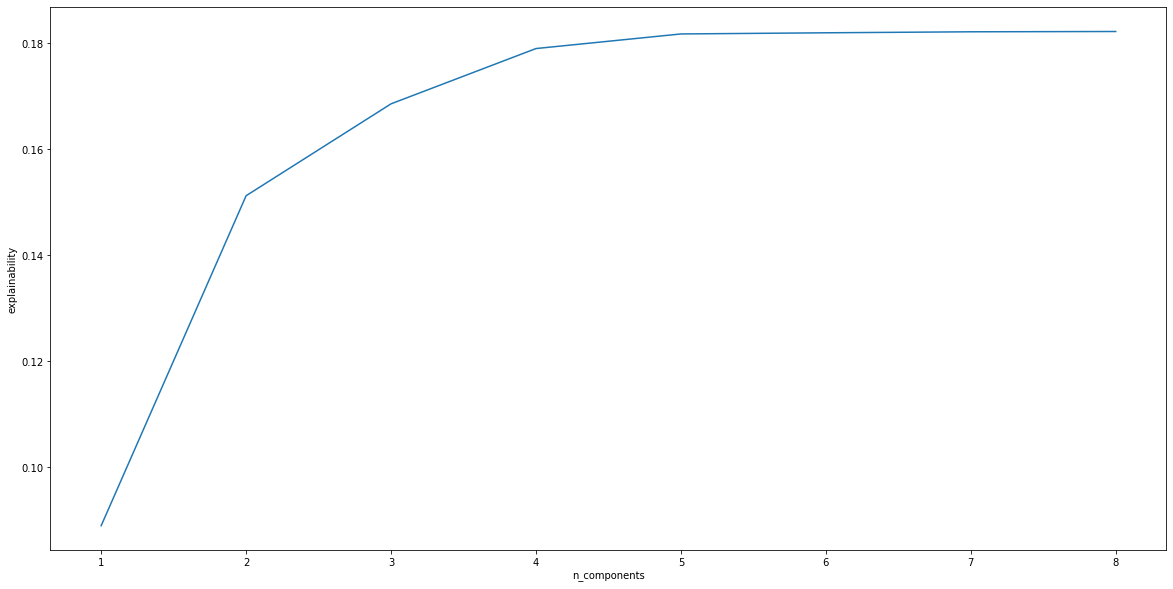

In [369]:
plt.figure(figsize=(20,10))
_ = sns.lineplot(
  data=pd.DataFrame(pca_explainability),
  x='n_components',
  y='explainability',
  # discrete=True,
)

Then we prepare the helper function

In [370]:
def pca(
  X: pd.DataFrame,
  y: pd.DataFrame,
  n_components: int = 2,
  pca_model=None
) -> tuple:
  if not pca_model:
    pca_model = PCA(
      n_components=n_components
    )
    pca_model.fit(X, y)

  X_pca = pca_model.fit_transform(X, y)

  return X_pca, pca_model

And use PCA with our Dataset

In [371]:
PCA_COMPONENTS = 2

X_train_pca, pca_model = pca(X_train, y_train, n_components=PCA_COMPONENTS)
X_test_pca, pca_model = pca(X_test, y_test, n_components=PCA_COMPONENTS, pca_model=pca_model)

### ICA

Independent Component Analysis strives to decompose the data into the number of components that ARE correlated with the dependant value, rather, the dependant value IS correlated with them

ICA is not the same than PCA, PCA tries to compress information, ICA attempts to identify the different features and patterns of the data

In [372]:
from sklearn.decomposition import FastICA

ica_explainability = list()

for n_components in range(1, len(INDEPENDANT_VARIABLES) + 1):
  ica_model = FastICA(
    n_components=n_components,
    whiten='unit-variance',
  )

  ica_model.fit(X_train, y_train)
  explainability = ica_model.components_

  ica_explainability.append({
    'n_components': n_components,
    'explainability': explainability.sum(),
  })

ica_explainability

[{'explainability': -0.003396800075300616, 'n_components': 1},
 {'explainability': 0.013384464158931957, 'n_components': 2},
 {'explainability': 0.06175195557661726, 'n_components': 3},
 {'explainability': -0.1531865171138644, 'n_components': 4},
 {'explainability': -0.11945892468925182, 'n_components': 5},
 {'explainability': 0.20124307019570642, 'n_components': 6},
 {'explainability': 0.31886401079102566, 'n_components': 7},
 {'explainability': 0.044748223164638334, 'n_components': 8}]

Aaaalll over again!! This time analyzing the ICA explainability curve

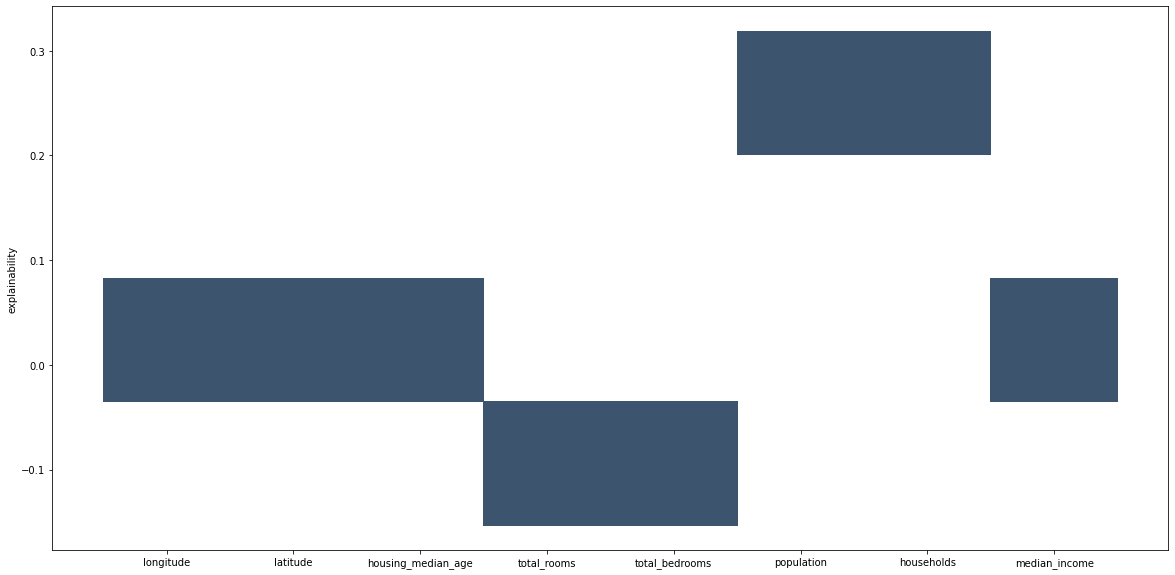

In [373]:
df_ica = pd.DataFrame(ica_explainability, index=ica_model.feature_names_in_)

plt.figure(figsize=(20,10))
_ = sns.histplot(
  data=df_ica,
  x=df_ica.index,
  y='explainability',
  # discrete=True,
)

And with the lineplot

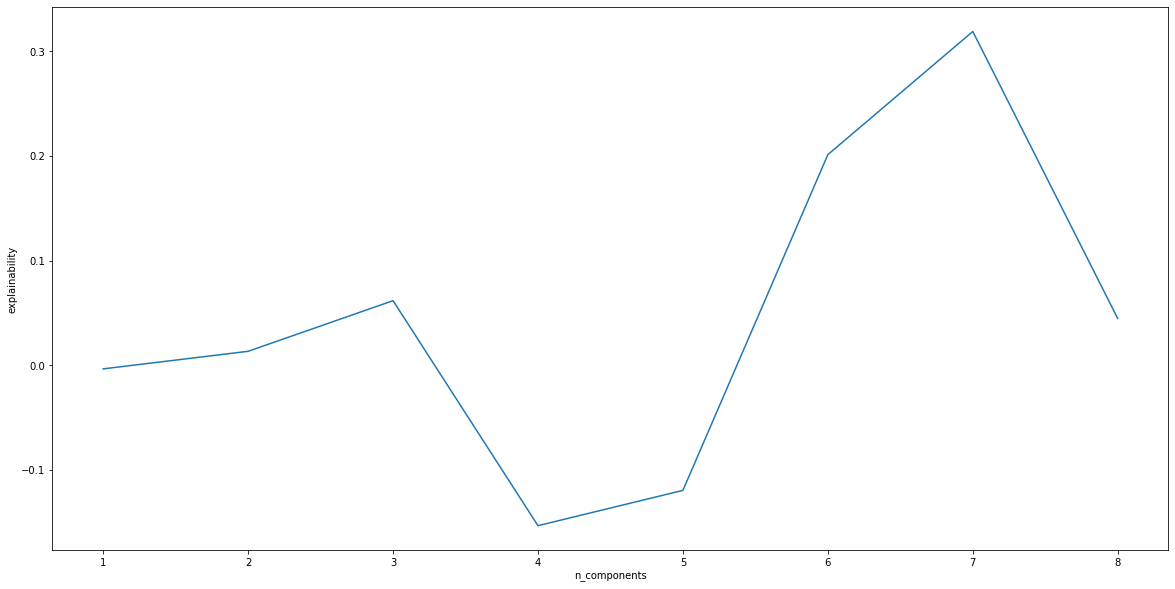

In [374]:
plt.figure(figsize=(20,10))
_ = sns.lineplot(
  data=pd.DataFrame(ica_explainability),
  x='n_components',
  y='explainability',
)

## Algorithms

The "fun" part, tuning and using the appropiate algorithms to solve our problem, predicting the housing price.

We'll be evaluating the score with the production values, while learning with our tranning set so that our model is evaluated with never seen before values.

When we're trying to predict, what we are really trying to do are aproximations close enough that give the minimum total error.

### Imports

In [375]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import r2_score

### Linear Regression

Supervised

It tries to predict the dependant value with the independant value and some weight

\begin{align}
    \mathbf{y} = a + b_X
\end{align}

When multivariate is the problem to solve, the formula stays the same, we'd take into account that a, b and X would be a vector each.

In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def linear_regression():
  regr = LinearRegression()
  return regr

Normal

In [377]:
lin_regr = linear_regression()
lin_score = train_sklearn_model( lin_regr, X_train, y_train, X_test, y_test, )
lin_score

'60.22%'

Using PCA

In [378]:
pca_lin_regr = linear_regression()
pca_lin_score = train_sklearn_model( pca_lin_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_lin_score

'0.41%'

And now we plot the results

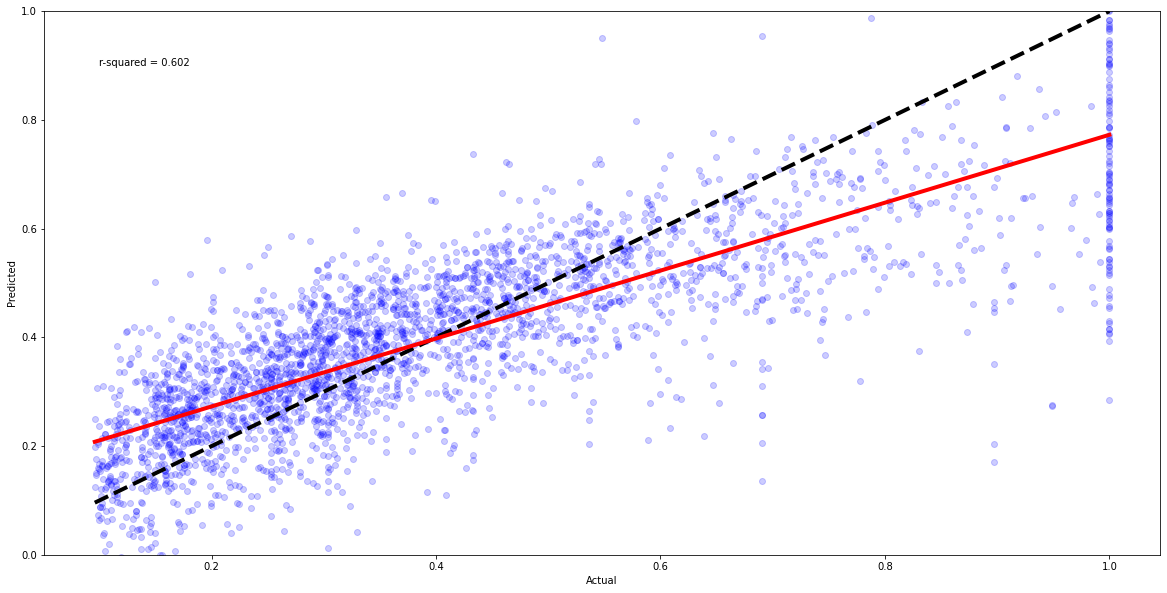

In [379]:
plot_regression(model=lin_regr, base_model=LinearRegression)

### Polynomial Linear Regression

Supervised.

Exactly the same than with Linear Regression, but this time around we add degrees; square roots, logarithms, whatever we need to add volume and modify the shape of our line

Get the sweet spot for the number of degrees for a polynomial feature

Source: https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

Degree: 1, Features: 9
Degree: 2, Features: 45
Degree: 3, Features: 165
Degree: 4, Features: 495
Degree: 5, Features: 1287


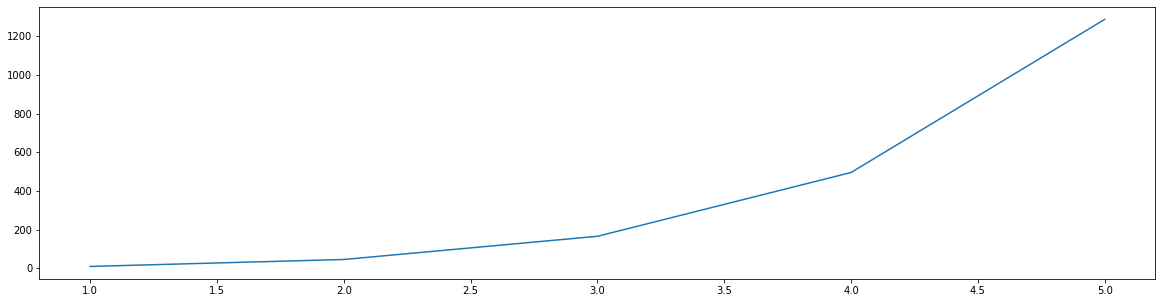

In [615]:
num_features = list()

degress = [i for i in range(1, 6)]
for d in degress:
	trans = PolynomialFeatures(degree=d)
	data = trans.fit_transform(X_train)
	num_features.append(data.shape[1])
	print('Degree: %d, Features: %d' % (d, data.shape[1]))

plt.figure(figsize=(20, 5))
plt.plot(degress, num_features)
plt.show()

2 degrees on the Polynomial Features seems to be the sweetspot

In [622]:
def polynomial_linear_regression(
  degree: int = 2
):
  regr = make_pipeline(
    MinMaxScaler(),
    PolynomialFeatures(degree=degree),
    LinearRegression(),
  )
  return regr

Using code and knowledge from that same article, we can try and find the impact the degrees have, not only on the number of features, but on the score and possible overfit

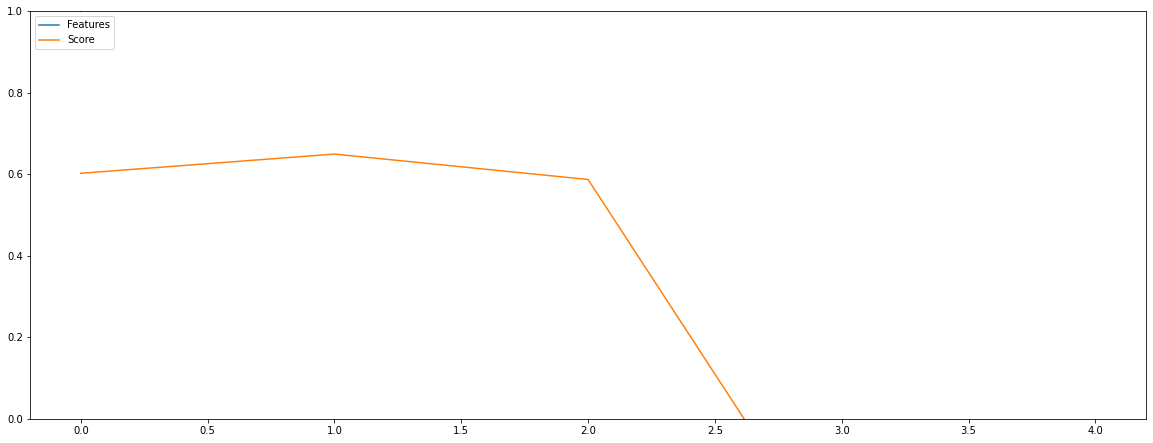

In [683]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

poly_features = dict()

max_poly_features = 5
for features in range(1, max_poly_features + 1):
  poly_model = polynomial_linear_regression(features).fit(X_train, y_train)
  poly_score = poly_model.score(X_test, y_test)
  poly_features[features] = poly_score

columns = ['Features', 'Score']
df_poly_features = pd.DataFrame(poly_features.items(), columns=columns)

# plot model performance for comparison
plt.figure(figsize=(20, 7.5))
plt.plot(df_poly_features[ columns[0] ], label=columns[0])
plt.plot(df_poly_features[ columns[1] ], label=columns[1])

plt.ylim(0, 1)

plt.legend(loc="upper left")
plt.show()

In [678]:
df_poly_features

Features      Score
0         1   0.602204
1         2   0.649296
2         3   0.586977
3         4  -0.367545
4         5 -41.178552

Normal

In [632]:
poly_lin_regr = polynomial_linear_regression()
poly_lin_score = train_sklearn_model( poly_lin_regr, X_train, y_train, X_test, y_test, )
poly_lin_score

'64.93%'

Using PCA

In [633]:
poly_lin_pca_regr = polynomial_linear_regression()
poly_lin_pca_score = train_sklearn_model( poly_lin_pca_regr, X_train_pca, y_train, X_test_pca, y_test, )
poly_lin_pca_score

'2.67%'

Plotting time!

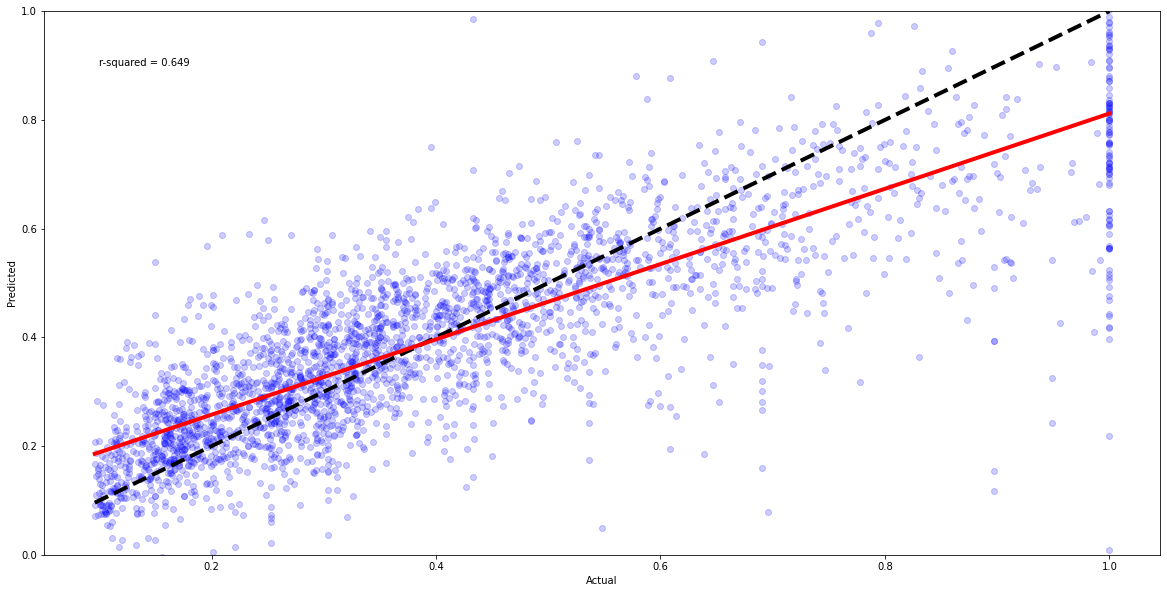

In [611]:
plot_regression(model=poly_lin_regr, base_model=LinearRegression)

And now a more fit plot, one that takes into account that we're actually plotting a polynomial, and not just a line, which is oure case scenario. That'd be what would be perfect.

But! Multivariate (more than one X column) Polynomial Linear Regression is something that does not get along with plotting, it'd be a plot too hard to understand, and that wouldn't be as useful as the one we already have above.

### Random Forest

Unsupervised

An ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

It's not an equation, rather a best-result-survivor where the we don't really know how they got there, but they did.

In [385]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor():
  regr = RandomForestRegressor(
    n_estimators=25,
    max_depth=25,
  )
  return regr

Normal

In [386]:
random_forest_regr = random_forest_regressor()
random_forest_score = train_sklearn_model( random_forest_regr, X_train, y_train, X_test, y_test, )
random_forest_score

'79.74%'

Using PCA

In [387]:
pca_random_forest_regr = random_forest_regressor()
pca_random_forest_score = train_sklearn_model( pca_random_forest_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_random_forest_score

'-16.23%'

Time to plot!

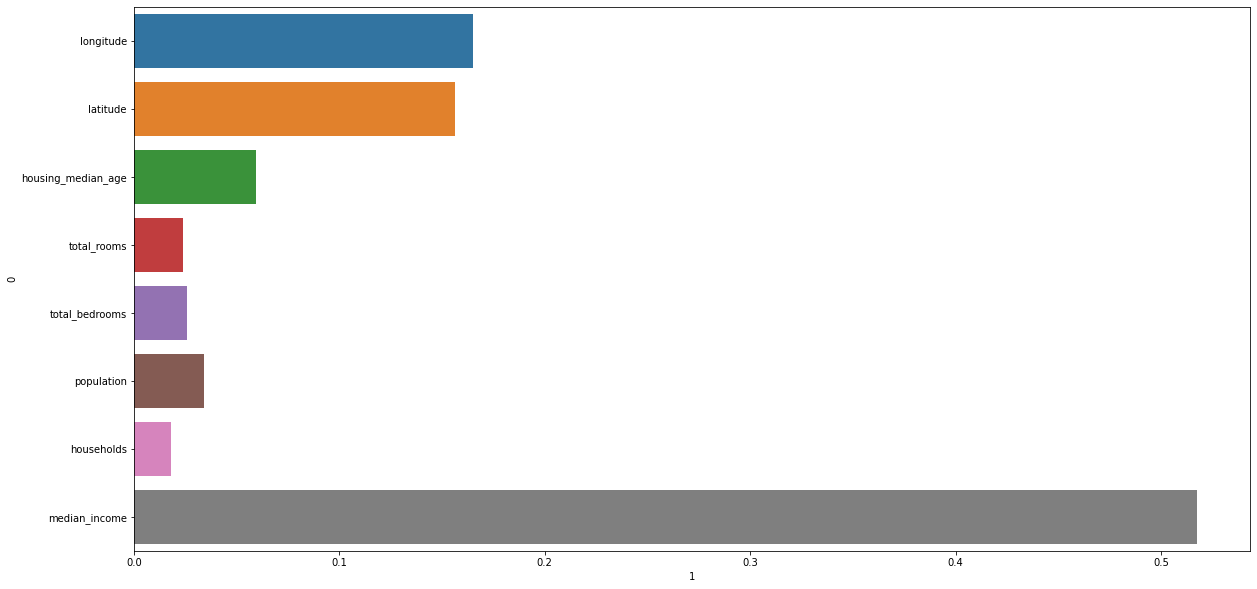

In [388]:
importances = random_forest_regr.feature_importances_
df_importances = pd.DataFrame(list(zip(INDEPENDANT_VARIABLES, importances)))
plt.figure(figsize=(20, 10))
sns.barplot(y=df_importances[0], x=df_importances[1])

And we also plot the regression

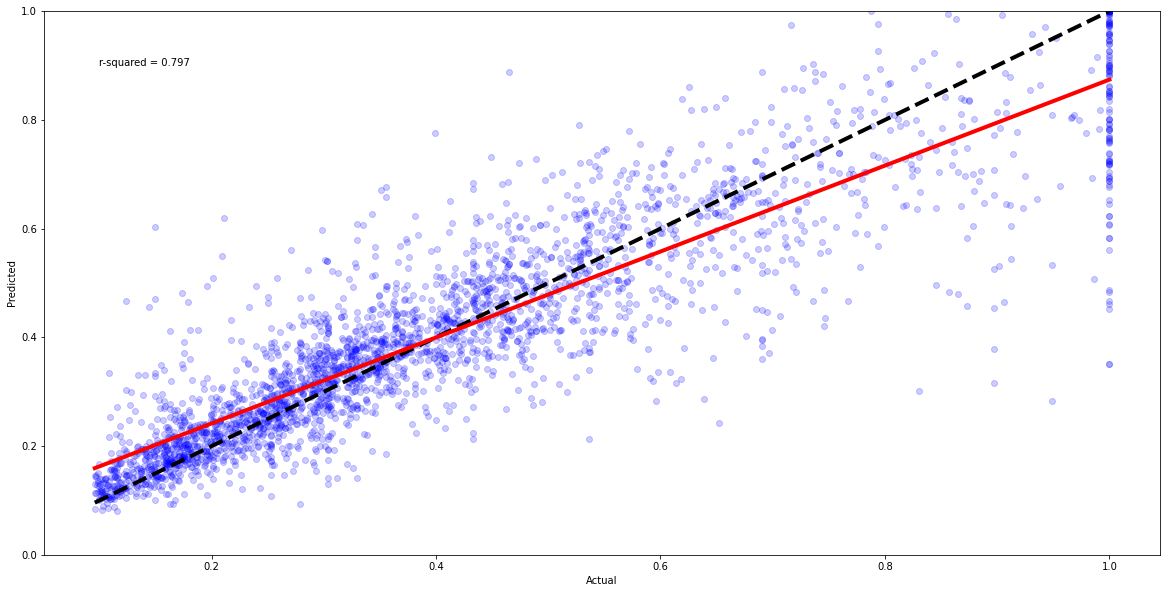

In [389]:
plot_regression(model=random_forest_regr, base_model=LinearRegression)

### Decision Tree

Supervised

A branch resolution into Machine Learning, the parameters get splitted into choices, and the branches get splitted to the level of depth that we want. Almost like a flowchart

The more depth the more precise, but invertionally proportional the less performant it gets

In [781]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regressor():
  regr = DecisionTreeRegressor(
    max_depth=4
  )
  return regr

Normal

In [782]:
decision_tree_regr = decision_tree_regressor()
decision_tree_score = train_sklearn_model( decision_tree_regr, X_train, y_train, X_test, y_test, )
decision_tree_score

'50.98%'

Using PCA

In [783]:
pca_decision_tree_regr = decision_tree_regressor()
pca_decision_tree_score = train_sklearn_model( pca_decision_tree_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_decision_tree_score

'8.19%'

It's plotting time!

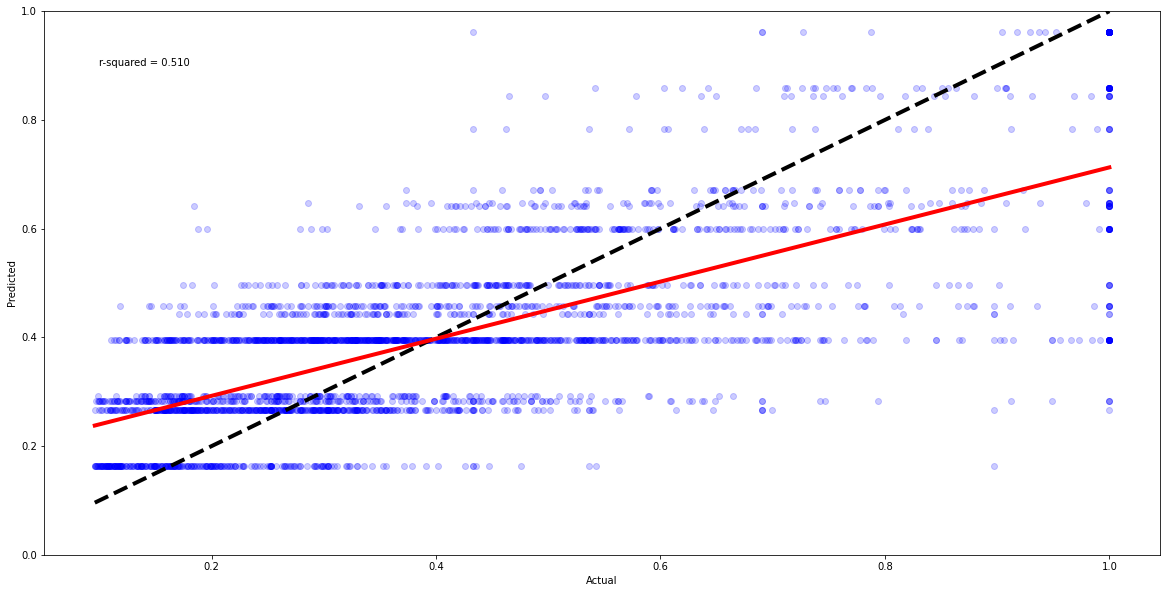

In [784]:
plot_regression(model=decision_tree_regr, base_model=LinearRegression)

But, since we're working with Decision Trees, one really cool thing we can do, is to plot the decision tree to see how it reaches it's conclusions

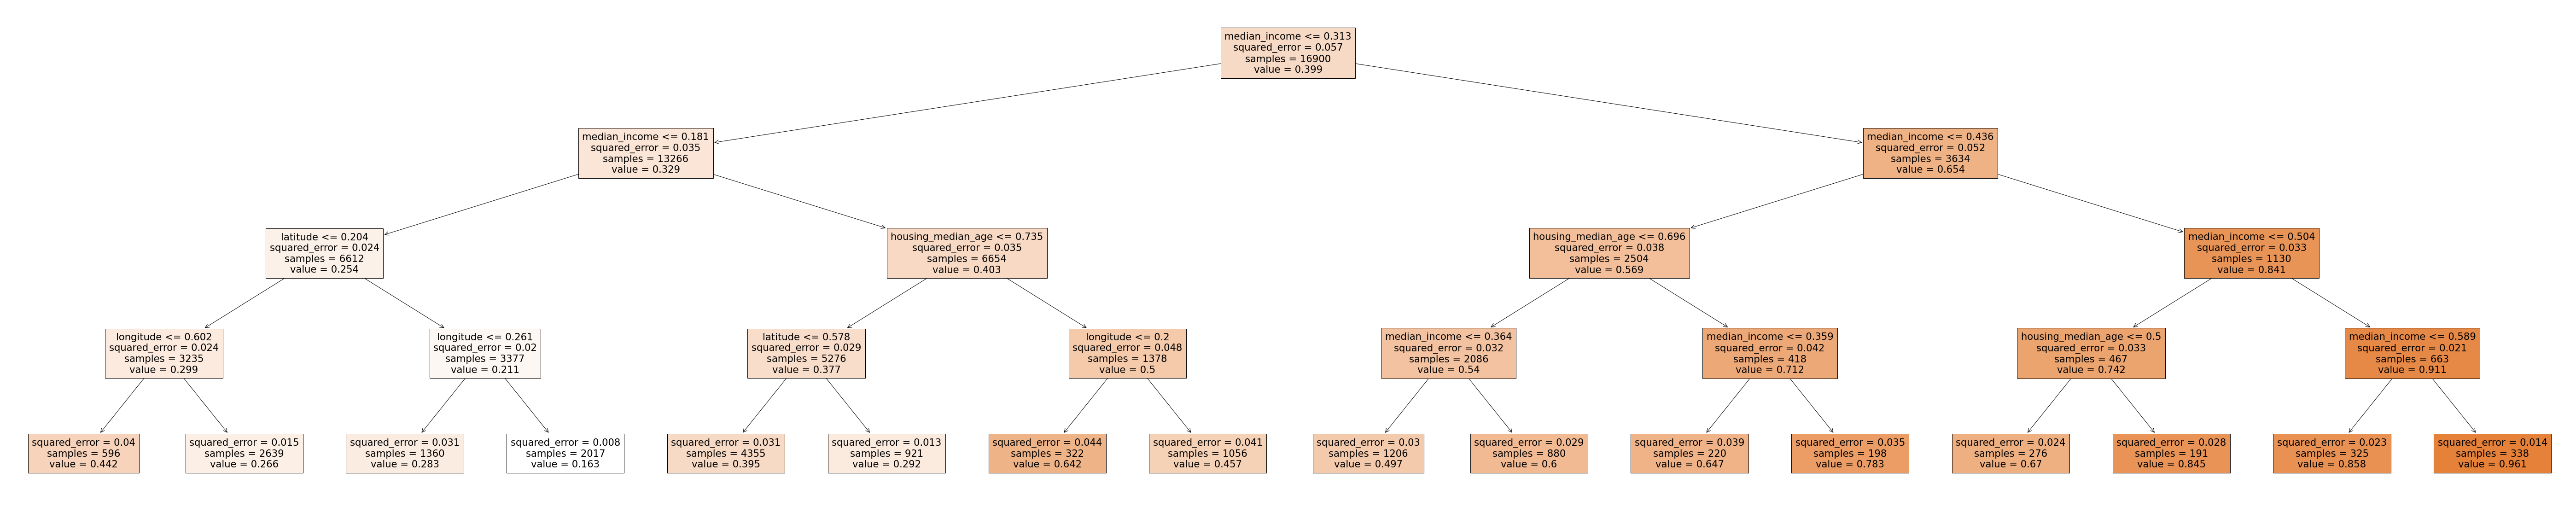

In [804]:
from sklearn import tree

figure = plt.figure(figsize=(100, 20))
_ = tree.plot_tree(
  decision_tree_regr,
  filled=True,
  # impurity=True,
  feature_names=list(X_train.columns),
  # max_depth = 2,
)
figure.savefig('/content/decision_tree.png', bbox_inches='tight')
# plt.close(figure) # toggle for the window display

### Support Vector Machine Regressor

Supervised

\begin{align}
    w = x+b=0
\end{align}

Support Vector Machine is a powerful Machine Learning technique that creates kernel to solve problems, that is to say, it divides the problem into subproblems that can be more easily solvable

In [394]:
from sklearn.svm import SVR

def svr():
  regr = SVR(
    C=2.0,
    epsilon=0.1
  )
  return regr

Normal

In [395]:
svr_regr = svr()
svr_score = train_sklearn_model( svr_regr, X_train, y_train, X_test, y_test, )
svr_score

'70.51%'

Using PCA

In [396]:
pca_svr_regr = svr()
pca_svr_score = train_sklearn_model( pca_svr_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_svr_score

'7.57%'

Plot! plot! plot!

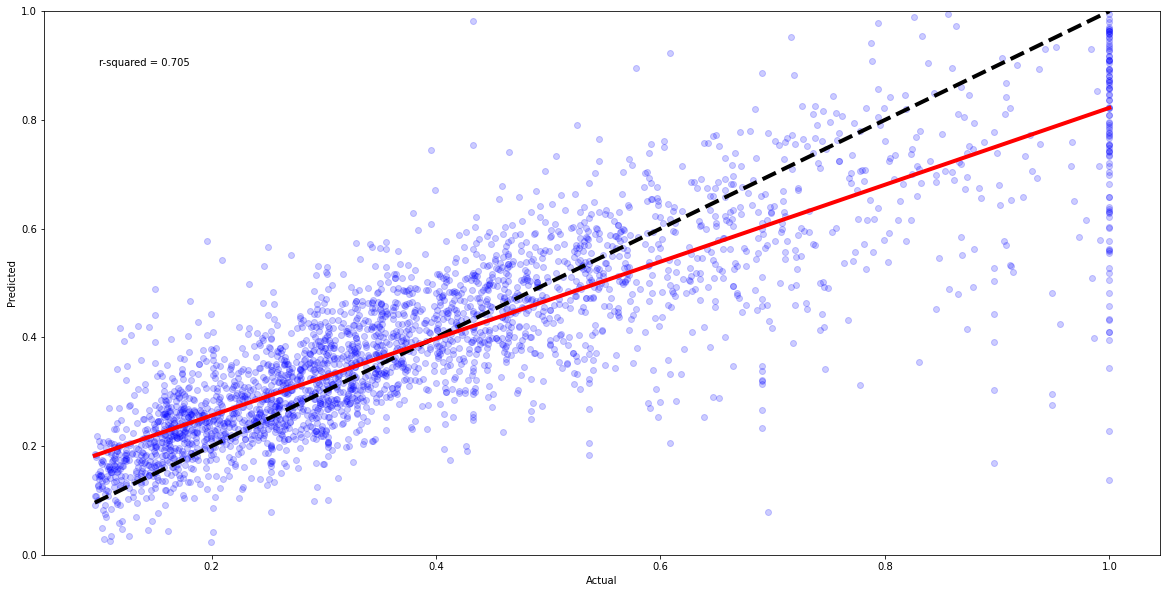

In [397]:
plot_regression(model=svr_regr, base_model=LinearRegression)

### Deep Learning

Unsupervised

A whole world in and on itself, supposed to be able to learn almost everything.

Deep Learning are Neural Networks, and are supposed to keep on learning in points where traditional Machine Learning stops making any sort of progress. It is said they can understand the root (or close to).

The formula to solve a neural network depends on it's network architecture and activation functions.

Let's import Tensorflow, that now comes with Keras, an industry standard package for Deep Learning and Neural Networks

In [398]:
import tensorflow as tf
tf.random.set_seed(THE_ANSWER_TO_ALL_OF_THE_QUESTIONS_IN_THE_UNIVERSE)

This function wil build our model

- The `input` layer will handle all the inputs
- The `hidden` will compute the values, here will happend the magic
- And finally, the `output` will retrieve the value in the format that we're expecting

By default, `relu` is the activation function used, but since we're doing regression, we'll use the `linear` activation

`Mean Squared Error` is one of the most common losses functions, really useful and it helps not give predictions that may be too large.

While `Adam` on the other side, is a _newly_ discovered optimizer function that's incredibly good, unseating `Stochastic Gradient Descent`, but, as with `SGD`, if we're not improving over the epochs of our learning, we have set the `learning_rate` too high, if we're learning, but the rate is too slow, we should slightly increase it.

The regularization helps us not to overfit our data by turning off and on some of our units at random, that way a unit won't get trained all the time and we'll have to adapt

In [545]:
def build_model() -> tf.keras.Model:
  # The layers and units of our architecture
  model = tf.keras.Sequential(
    name='California-Housing-Pricing-Neural-Netowrk',
    layers=[
      tf.keras.layers.Dense(
        units=1,
        input_shape=(X_train.shape[1],),
        activation='relu',
        name='Input-layer',
        kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=tf.keras.regularizers.L2(1e-4),
        activity_regularizer=tf.keras.regularizers.L2(1e-5),
      ),
      tf.keras.layers.Dense(
        units=64,
        activation='relu',
        name='Hidden-layer',
        kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=tf.keras.regularizers.L2(1e-4),
        activity_regularizer=tf.keras.regularizers.L2(1e-5),
      ),
      tf.keras.layers.Dense(
        units=1,
        activation='linear',
        name='Output-layer',
        kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=tf.keras.regularizers.L2(1e-4),
        activity_regularizer=tf.keras.regularizers.L2(1e-5),
      ),
    ],
  )

  # Compiling the model
  model.compile(
    loss=tf.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(
      learning_rate=.001
    ),
    metrics=[
      tf.metrics.mean_absolute_error,
      # tf.keras.metrics.Accuracy(),
    ]
  )

  # The architecture of our neural network
  model.summary()

  return model

Now that we've prepared the architecture, we need to start the learning/training so that we can truly start and evaluate our Deep Learning model.

Having an early stopping callback will prevent our model from training when no progress has been made, or when we may be overfitting it. Which is pretty neat, but for it to work we need to set some sort of validation data it can evaluate.

In [546]:
def deep_learning_fit(
  model: tf.keras.Model,
  X_train: pd.DataFrame,
  y_train: pd.DataFrame,
  epochs: int = 15
) -> tf.keras.callbacks.History:
  return model.fit(
    X_train,
    y_train,
    validation_split=.2,
    epochs=epochs,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=2
      )
    ],
    # shuffle=True,
    # batch_size=64
  )

And now we put it all together

In [547]:
deep_learning_model = build_model()
history = deep_learning_fit(deep_learning_model, X_train, y_train, epochs=35)

Model: "California-Housing-Pricing-Neural-Netowrk"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-layer (Dense)         (None, 1)                 9         
                                                                 
 Hidden-layer (Dense)        (None, 64)                128       
                                                                 
 Output-layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
423/423 [==============================] - 2s 3ms/step - loss: 0.0219 - mean_absolute_error: 0.1177 - val_loss: 0.2476 - val_mean_absolute_error: 0.4745
Epoch 2/35
423/423 [==============================] - 1s 2ms/step - loss: 0.0171 - mean_absolute_error: 0.1075 - val_loss: 0.24

One of the good things about Tensorflow is that we can plot the training to see it's evolution, only if we've saved the return of our fit

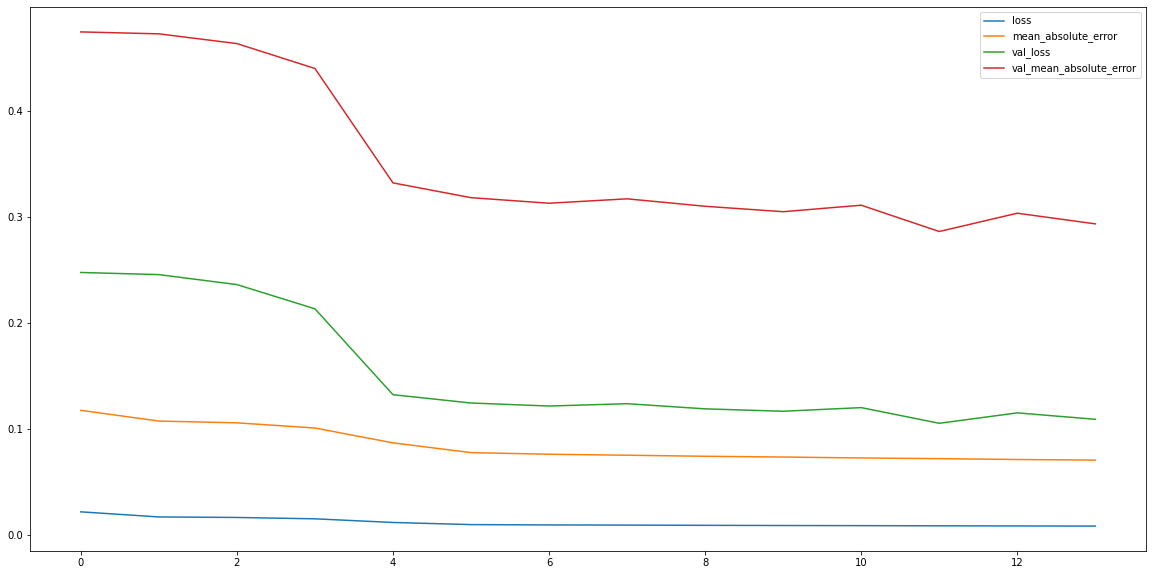

In [548]:
df_history = pd.DataFrame(history.history)

df_history.plot(figsize=(20,10))

To evaluate our model, we'll use the `r2_score` metric function, the one used and recomended for regression of continue values

In [601]:
y_pred = deep_learning_model.predict(X_test)
deep_learning_score = r2_score(y_test, y_pred)
format_score(deep_learning_score)

'46.76%'

On the training set

In [544]:
y_pred = deep_learning_model.predict(X_train)
train_deep_learning_score = r2_score(y_train, y_pred)
format_score(train_deep_learning_score)

'-16.98%'

We can also plot the Deep Learning results, and we should!

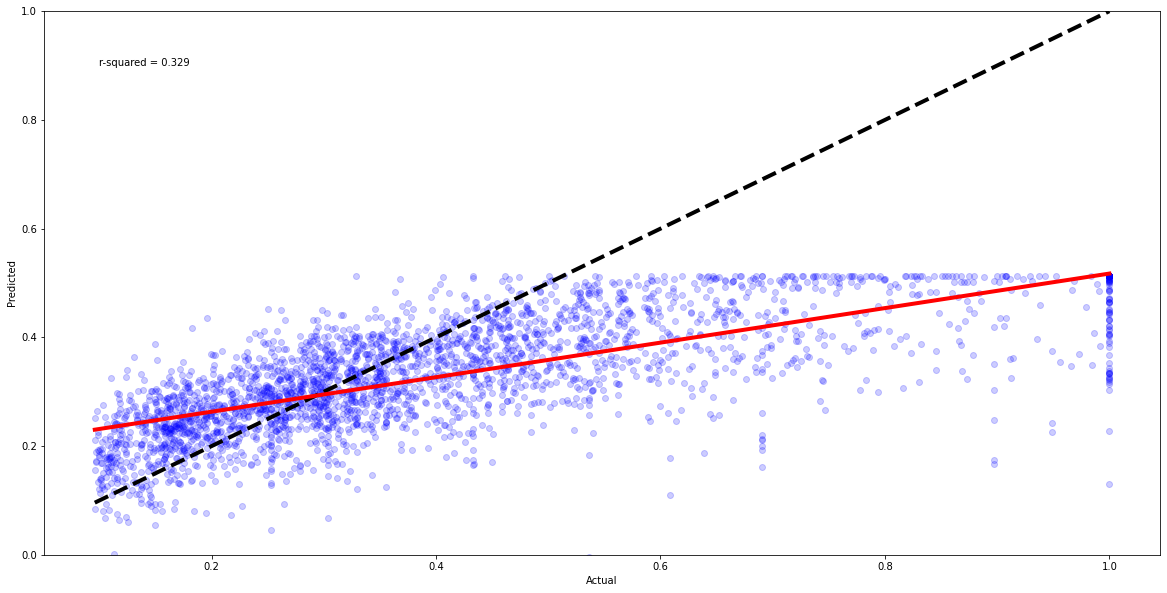

In [530]:
plot_regression(model=deep_learning_model, base_model=LinearRegression)

### Single-Shot

Unsupervised

Is a variant of Deep Learning that attempts to solve the problem at once, on without hidden layers, it usually is not the most effective way, but it can surprise, and while note being the most precise, it is really simple and efficient.

A really simple network architecture it's all that suffices

In [550]:
def build_single_shot_model():
  single_shot_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=1, activation='linear'),
  ])

  single_shot_model.compile(
    loss=tf.losses.mean_squared_error,
    optimizer=tf.optimizers.Adam(
      learning_rate=0.005
    ),
  )

  return single_shot_model

Basic training, just as before

In [551]:
def single_shot_fit(
  model
):
  return model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=15,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)],
    # verbose=0 # don't display the training progress
  )

And we train the results

In [552]:
single_shot_model = build_single_shot_model()
single_shot_history = single_shot_fit(single_shot_model)

Epoch 1/15
423/423 [==============================] - 2s 4ms/step - loss: 0.0207 - val_loss: 0.2506
Epoch 2/15
423/423 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.1609
Epoch 3/15
423/423 [==============================] - 1s 3ms/step - loss: 0.0093 - val_loss: 0.1147
Epoch 4/15
423/423 [==============================] - 2s 5ms/step - loss: 0.0083 - val_loss: 0.1156
Epoch 5/15
423/423 [==============================] - 1s 2ms/step - loss: 0.0079 - val_loss: 0.1094
Epoch 6/15
423/423 [==============================] - 1s 2ms/step - loss: 0.0077 - val_loss: 0.1145
Epoch 7/15
423/423 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.1072
Epoch 8/15
423/423 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.1126
Epoch 9/15
423/423 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.1185


Plot it's training progress to see it's evolution

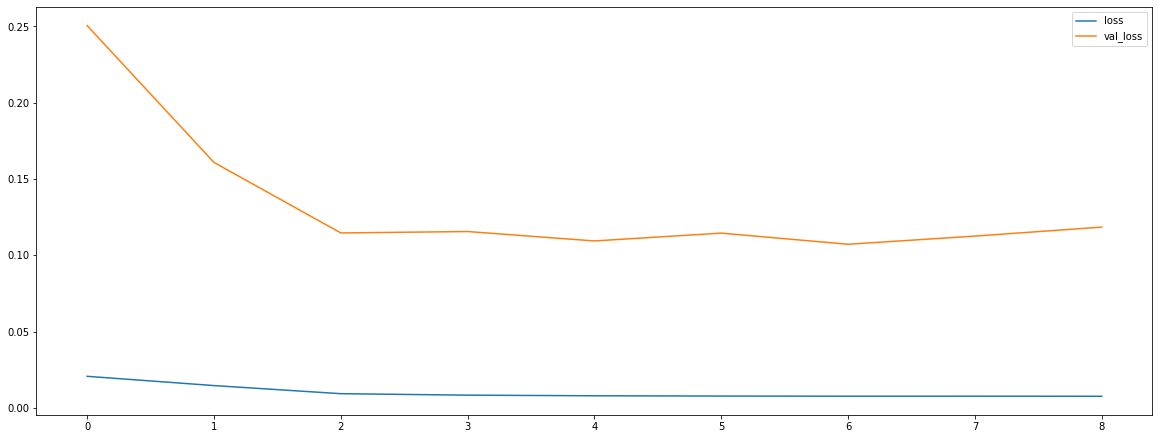

In [553]:
pd.DataFrame(single_shot_history.history).plot(figsize=(20,7.5))

In [554]:
single_shot_score = r2_score(y_test, single_shot_model.predict(X_test))
format_score(single_shot_score)

'43.41%'

Single-Shot has proven to be a, not that bad of an option, and really good taking into account it's architecture and simplicity

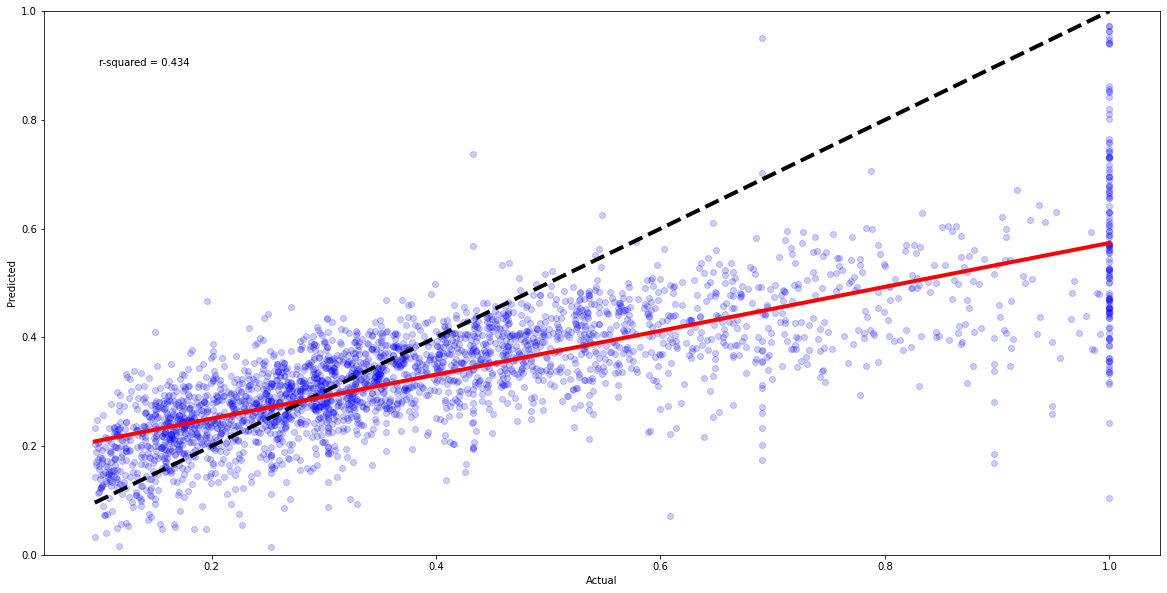

In [555]:
plot_regression(model=single_shot_model, base_model=LinearRegression)

### Lasso

Supervised

It's a Machine Learning technique that uses selection and regularization to improve it's results. Also called L1 regularization technique

In [412]:
from sklearn.linear_model import Lasso

def lasso():
  regr = Lasso(
    alpha=0.001
  )
  return regr

Normal

In [413]:
lasso_regr = lasso()
lasso_score = train_sklearn_model( lasso_regr, X_train, y_train, X_test, y_test, )
lasso_score

'55.49%'

Using PCA

In [414]:
pca_lasso_regr = lasso()
pca_lasso_score = train_sklearn_model( pca_lasso_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_lasso_score

'0.52%'

And we plot it

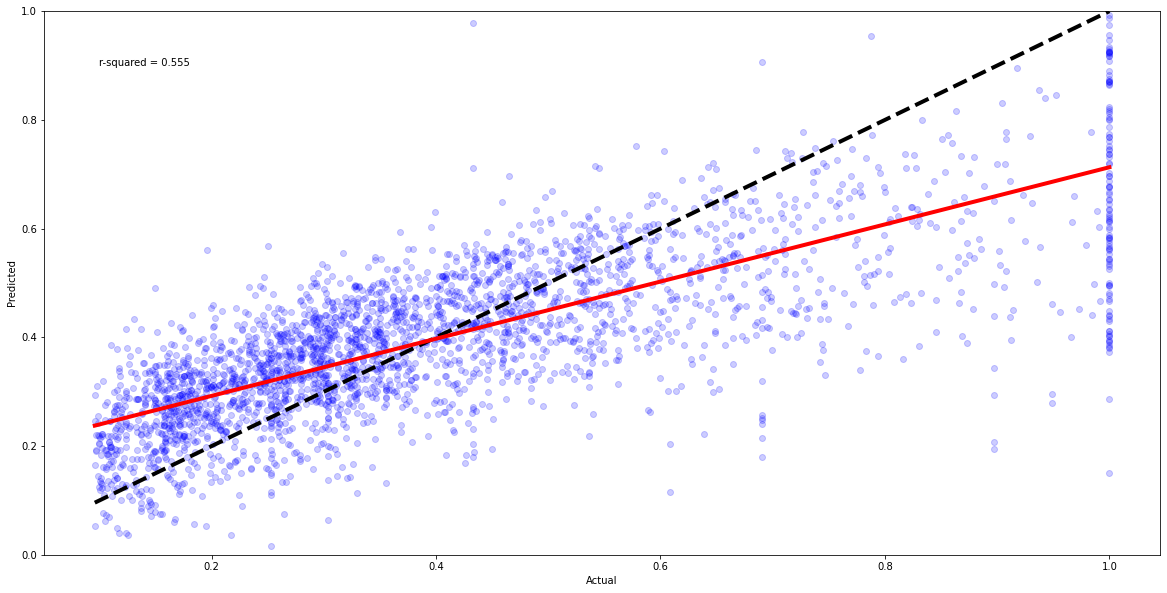

In [415]:
plot_regression(model=lasso_regr, base_model=LinearRegression)

### Ridge

Supervised

Ridge regression is a regularization technique, which is used to reduce the complexity of the model. Also called L2 regularization technique

In [416]:
from sklearn.linear_model import Ridge

def ridge():
  regr = Ridge(
    alpha=1.0
  )
  return regr

Normal

In [417]:
ridge_regr = ridge()
ridge_score = train_sklearn_model( ridge_regr, X_train, y_train, X_test, y_test )
ridge_score

'60.14%'

Using PCA

In [418]:
pca_ridge_regr = ridge()
pca_ridge_score = train_sklearn_model( pca_ridge_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_ridge_score

'0.42%'

And we plot it

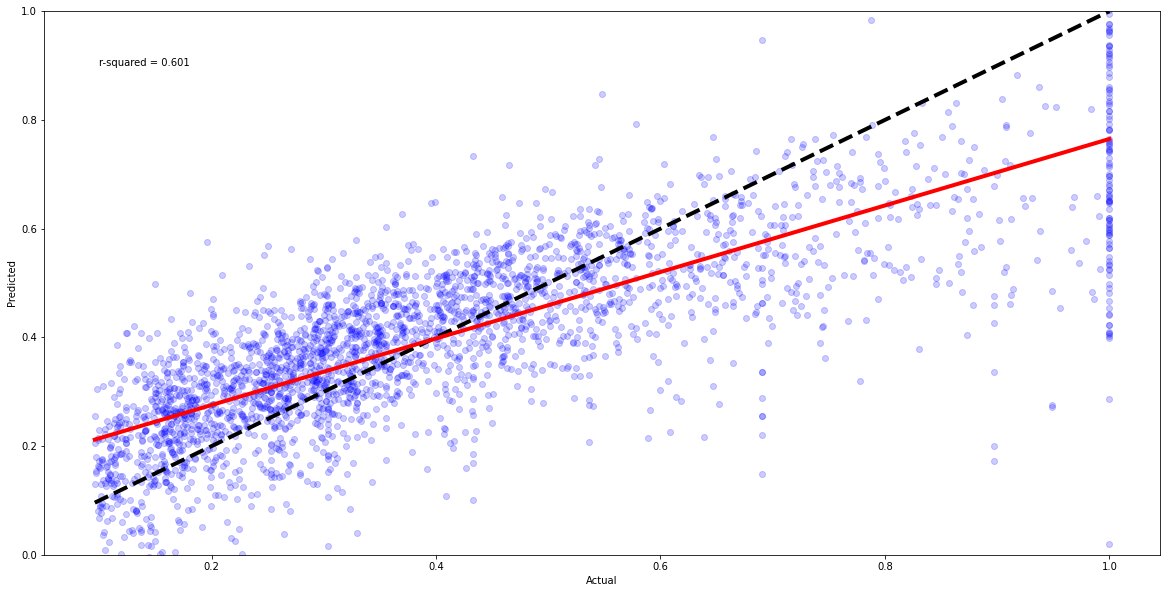

In [419]:
plot_regression(model=ridge_regr, base_model=LinearRegression)

### Bayesian Ridge

Supervised

The bayesian implementation of the Ridge

In [420]:
from sklearn.linear_model import BayesianRidge

def bayesian_ridge():
  regr = BayesianRidge()
  return regr

Normal

In [421]:
bayesian_ridge_regr = bayesian_ridge()
bayesian_ridge_score = train_sklearn_model( bayesian_ridge_regr, X_train, y_train, X_test, y_test )
bayesian_ridge_score

'60.22%'

Using PCA

In [422]:
pca_bayesian_ridge_regr = bayesian_ridge()
pca_bayesian_ridge_score = train_sklearn_model( pca_bayesian_ridge_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_bayesian_ridge_score

'0.42%'

And we plot it

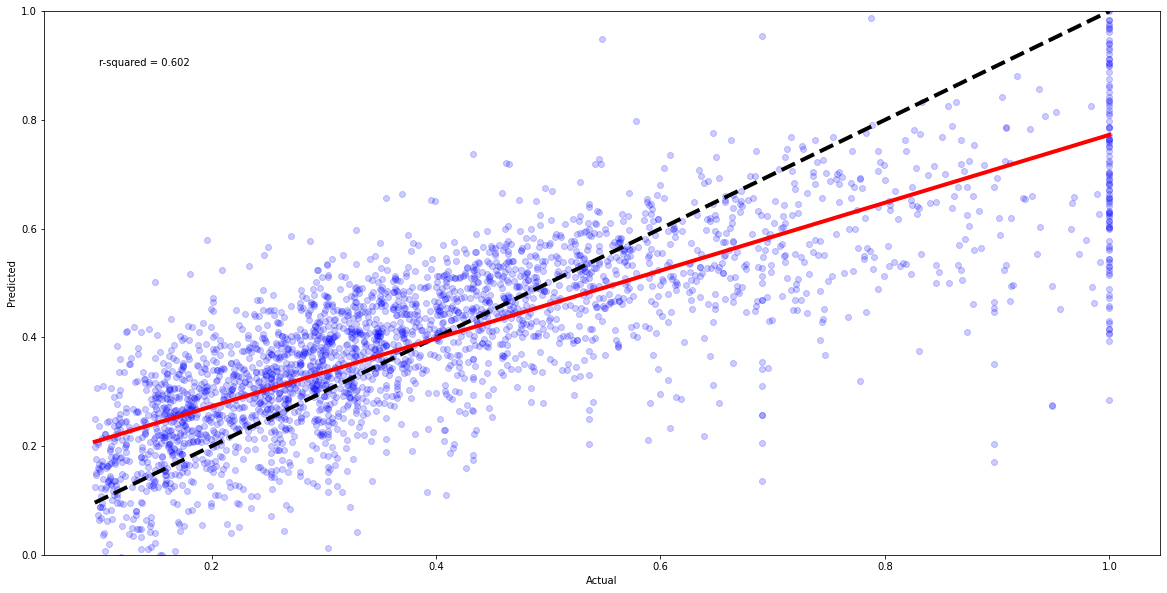

In [423]:
plot_regression(model=bayesian_ridge_regr, base_model=LinearRegression)

### Bayesian ARD (Automatic Relevance Determination) Regression

Supervised

It's the Bayessian Ridge with a couple of tweaks down the line. For our intents and purposes, it's a twin of the `Bayesian Ridge`

In [424]:
from sklearn.linear_model import ARDRegression

def bayesian_ard():
  regr = ARDRegression()
  return regr

Normal

In [425]:
bayesian_ard_regr = bayesian_ard()
bayesian_ard_score = train_sklearn_model( bayesian_ard_regr, X_train, y_train, X_test, y_test )
bayesian_ard_score

'60.22%'

Using PCA

In [426]:
pca_bayesian_ard_regr = bayesian_ridge()
pca_bayesian_ard_score = train_sklearn_model( pca_bayesian_ard_regr, X_train_pca, y_train, X_test_pca, y_test )
pca_bayesian_ard_score

'0.42%'

And we plot it

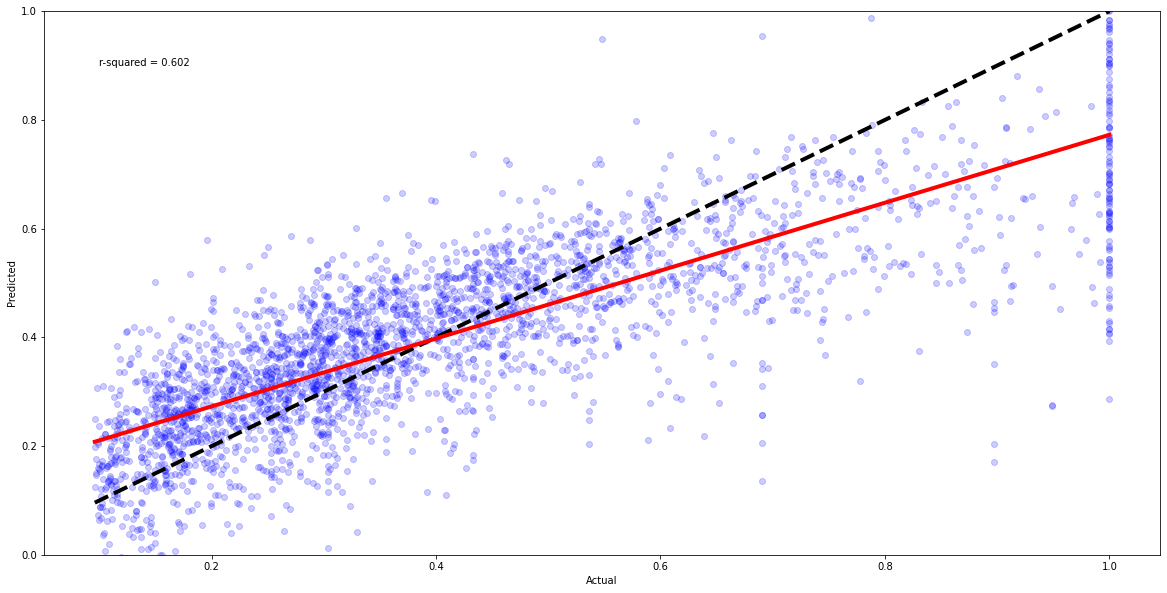

In [427]:
plot_regression(model=bayesian_ard_regr, base_model=LinearRegression)

## Visualizations

### Median income

#### Per location

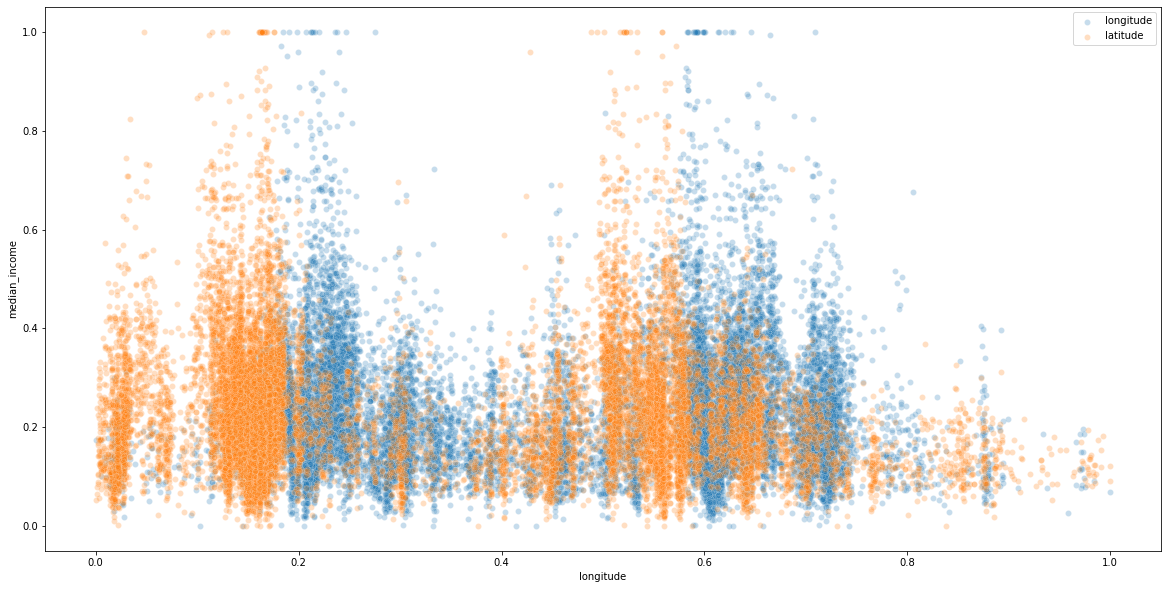

In [677]:
plt.figure(figsize=(20,10))
temp_df = X_train # [::25]
observer_col = 'median_income'

sns.scatterplot( data=temp_df, x='longitude', y=observer_col, alpha=.25, label='longitude' )
sns.scatterplot( data=temp_df, x='latitude', y=observer_col, alpha=.25, label='latitude' )

#### Per rooms

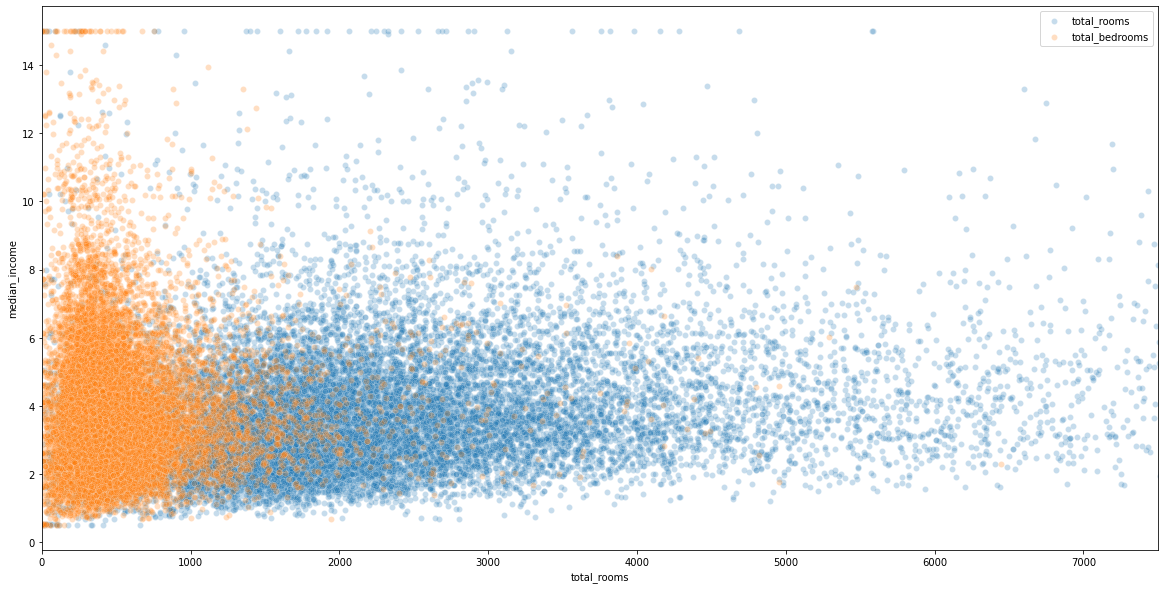

In [675]:
plt.figure(figsize=(20,10))
temp_df = df_train
observer_col = 'median_income'

plt.xlim(0, 7_500)
sns.scatterplot( data=temp_df, x='total_rooms', y=observer_col, alpha=.25, label='total_rooms' )
sns.scatterplot( data=temp_df, x='total_bedrooms', y=observer_col, alpha=.25, label='total_bedrooms' )

#### Per population

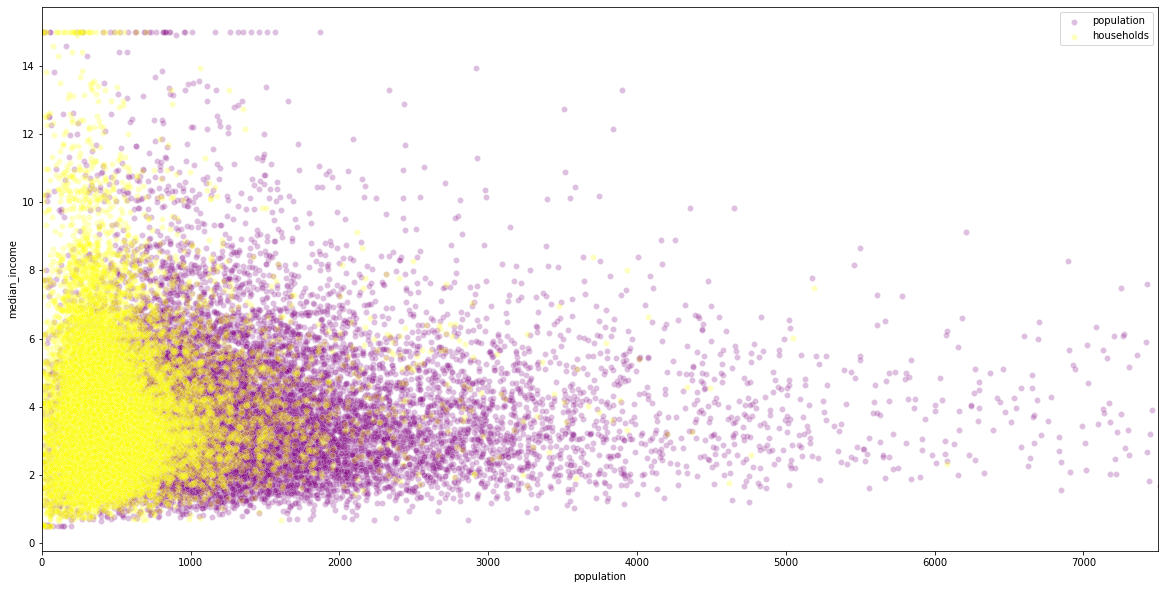

In [676]:
plt.figure(figsize=(20,10))
temp_df = df_train
observer_col = 'median_income'

plt.xlim(0, 7_500)
sns.scatterplot( data=temp_df, x='population', y=observer_col, alpha=.25, color='purple', label='population' )
sns.scatterplot( data=temp_df, x='households', y=observer_col, alpha=.25, color='yellow', label='households' )

### House value

#### Top median income

Now that we know that the `median_income` contributes the most to the house pricing value, it is not concluded, but we can see if the higher the income, the higher the median house pricing value.

Let's first get some statistic values

In [ ]:
df_train['median_income'].sort_values(ascending=False).head()

And we plot it

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot( data=df_train[ df_train['median_income'] >= 10 ], x='median_income', y=DEPENDANT_VARIABLE, alpha=.25, color='darkgreen' )

The higher the income, indeed, the higher the house pricing value, but there's not as many people with higher income as there are with lower, which makes sense

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot( data=df_train[ df_train['median_income'] <= 3 ], x='median_income', y=DEPENDANT_VARIABLE, alpha=.25, color='darkgreen' )

And, even though there are high housing price values in places where the `median_income`, the price drastically drops wherever the income gets lower

In [ ]:
plt.figure(figsize=(20,10))

sns.scatterplot( data=df_train, x='median_income', y=DEPENDANT_VARIABLE, alpha=.25, color='darkgreen' )

And the total view to gain some perspective

#### Given population and households

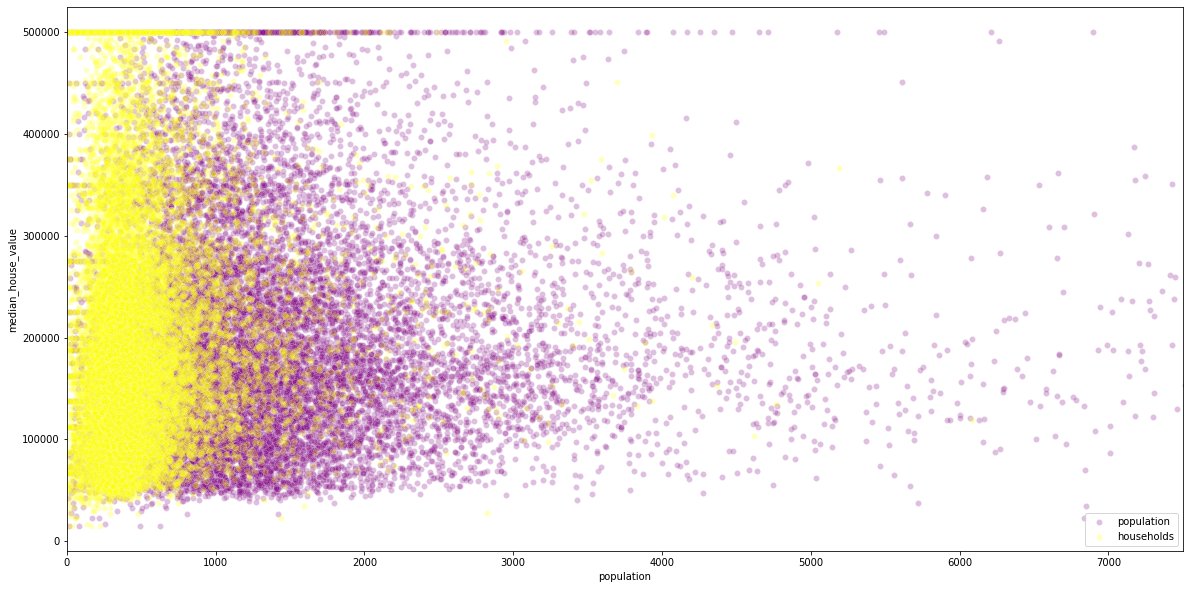

In [679]:
plt.figure(figsize=(20,10))
temp_df = df_train

plt.xlim(0, 7_500)
sns.scatterplot( data=temp_df, x='population', y=DEPENDANT_VARIABLE, alpha=.25, color='purple', label='population' )
sns.scatterplot( data=temp_df, x='households', y=DEPENDANT_VARIABLE, alpha=.25, color='yellow', label='households' )

And now in 3D!! It will help us visualize three dimensions, which will represent ouir three variables

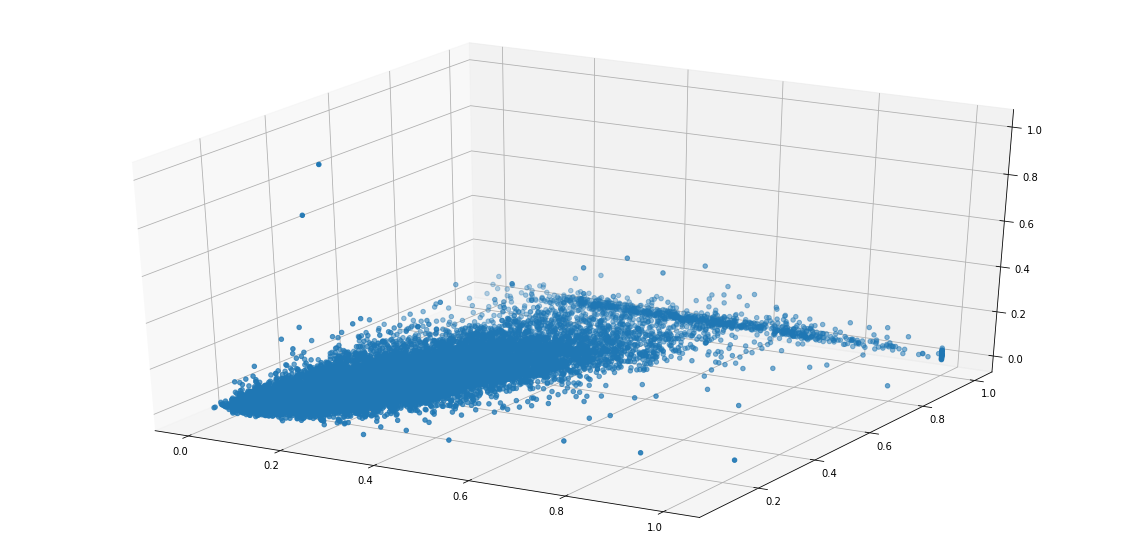

In [686]:
fig = plt.figure(figsize=(20,10))
temp_df = X_train

ax = fig.add_subplot(projection='3d')
ax.scatter(
  zs=temp_df['population'],
  ys=y_train.values,
  xs=temp_df['median_income'],
  marker='o',
)

Or an "easier" to understand plot, a pairplot

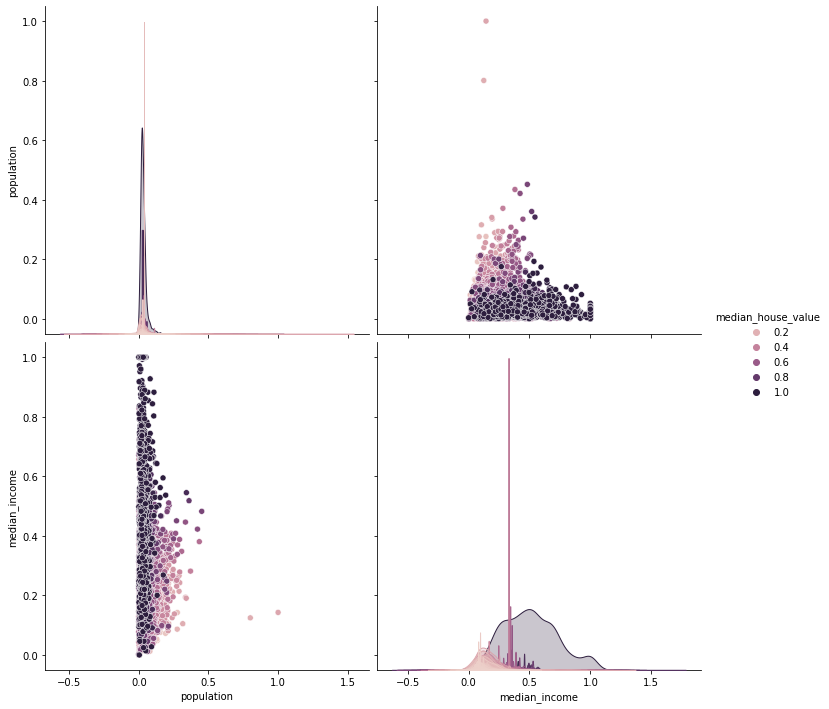

In [681]:
df_3D = pd.DataFrame(
  zip( temp_df['population'], y_train.values, temp_df['median_income'], ),
  columns=[ 'population', DEPENDANT_VARIABLE, 'median_income', ]
)
# plt.figure(figsize=(35, 15))
sns.pairplot(
  df_3D,
  # hue='X',
  height=5,
  # width=10,
  aspect=1.0,
  hue=DEPENDANT_VARIABLE,
)

#### By it's location

The other two features that the Random Forest considered important, where the location vector, `longitude` and `latitude`

<Figure size 1440x720 with 0 Axes>

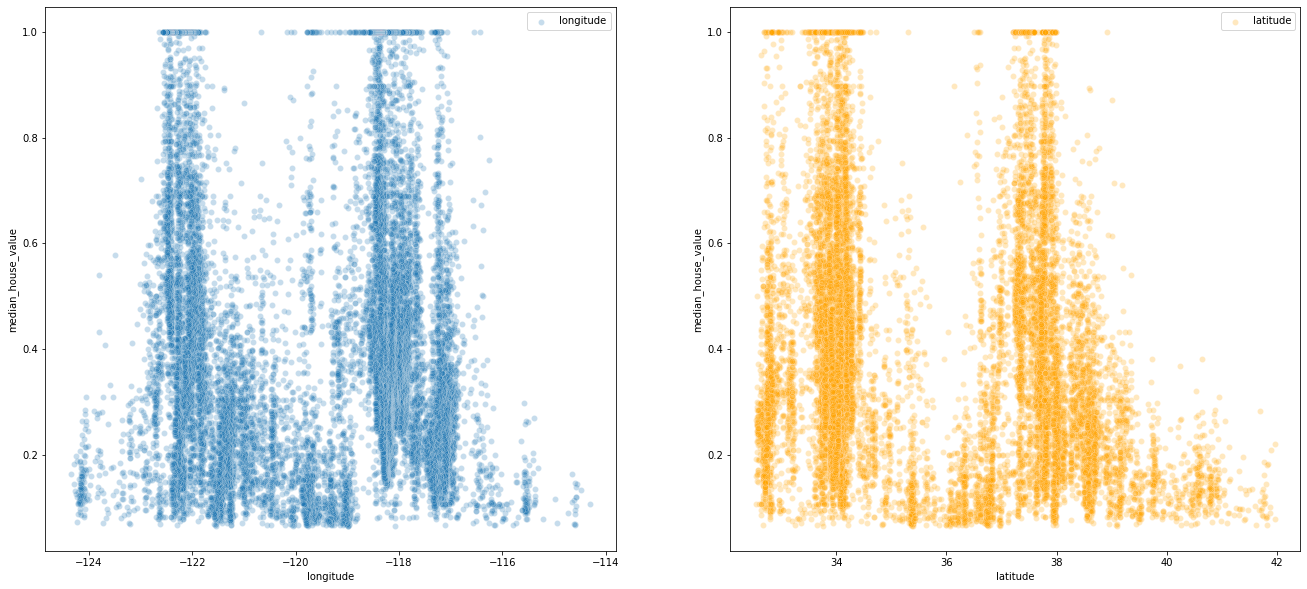

In [766]:
plt.figure(figsize=(20,10))
temp_df = X_train

fig, axes = plt.subplots(1, 2, figsize=(22.5,10))

sns.scatterplot( x=df_train['longitude'], y=y_train, alpha=.25, label='longitude', ax=axes[0] )
sns.scatterplot( x=df_train['latitude'], y=y_train, alpha=.25, label='latitude', ax=axes[1], color='orange' )

### Algorithms Comparison

We must now merge all of the scores we've saved of the algorithms for a quick and easy comparison

In [785]:
scores_comparison = np.array([
  ['lin_regr', lin_score, 'supervised'],
  ['pca_lin_regr', pca_lin_score, 'supervised'],
  ['poly_lin_regr', poly_lin_score, 'supervised'],
  ['poly_lin_pca_regr', poly_lin_pca_score, 'supervised'],
  ['random_forest_regr', random_forest_score, 'unsupervised'],
  ['pca_random_forest_regr', pca_random_forest_score, 'unsupervised'],
  ['decision_tree_regr', decision_tree_score, 'supervised'],
  ['pca_decision_tree_regr', pca_decision_tree_score, 'supervised'],
  ['svr_regr', svr_score, 'supervised'],
  ['pca_svr_regr', pca_svr_score, 'supervised'],
  ['deep_learning_model', deep_learning_score, 'unsupervised'],
  ['single_shot_model', single_shot_score, 'unsupervised'],
  ['lasso_regr', lasso_score, 'unsupervised'],
  ['pca_lasso_regr', pca_lasso_score, 'unsupervised'],
  ['ridge_regr', ridge_score, 'supervised'],
  ['pca_ridge_regr', pca_ridge_score, 'supervised'],
  ['bayesian_ridge_regr', bayesian_ridge_score, 'supervised'],
  ['pca_bayesian_ridge_regr', pca_bayesian_ridge_score, 'supervised'],
  ['bayesian_ard_regr', bayesian_ard_score, 'supervised'],
  ['pca_bayesian_ard_regr', pca_bayesian_ard_score, 'supervised'],
])

And we plot the comparison

In [786]:
df_scores_comparison = pd.DataFrame(
  scores_comparison,
  columns=[
    'Algorithm',
    'Score',
    'Type'
  ]
)

We must convert our formatted score to float, not necessary if we would of saved the score in it's proper, original format

In [787]:
def formatted_score_to_str(
  score: str
) -> float:
  return float(score[:-1])
formatted_score_to_str('43.41%')

43.41

Capitalizes all the text, for style points

In [788]:
def capitalize(
  text: str
):
  capitalized_text = text.replace('_', ' ')
  capitalized_text = capitalized_text.title()

  return capitalized_text
capitalize('pca_bayesian_ard_regr')

'Pca Bayesian Ard Regr'

And we map the functions to their respective columns

In [789]:
df_scores_comparison['Score'] = df_scores_comparison['Score'].apply(formatted_score_to_str)
df_scores_comparison['Algorithm'] = df_scores_comparison['Algorithm'].apply(capitalize)
df_scores_comparison['Type'] = df_scores_comparison['Type'].apply(capitalize)

To plot the algorithms score we could sort them, but having them on their own, in order or implementation we can see the progress we've made, and how much progress have we archieved with each algorithm and/or technique.

Are these the algorithms used to it's fullest potential? No, not even close, but are an starting point, or at least it is for me.

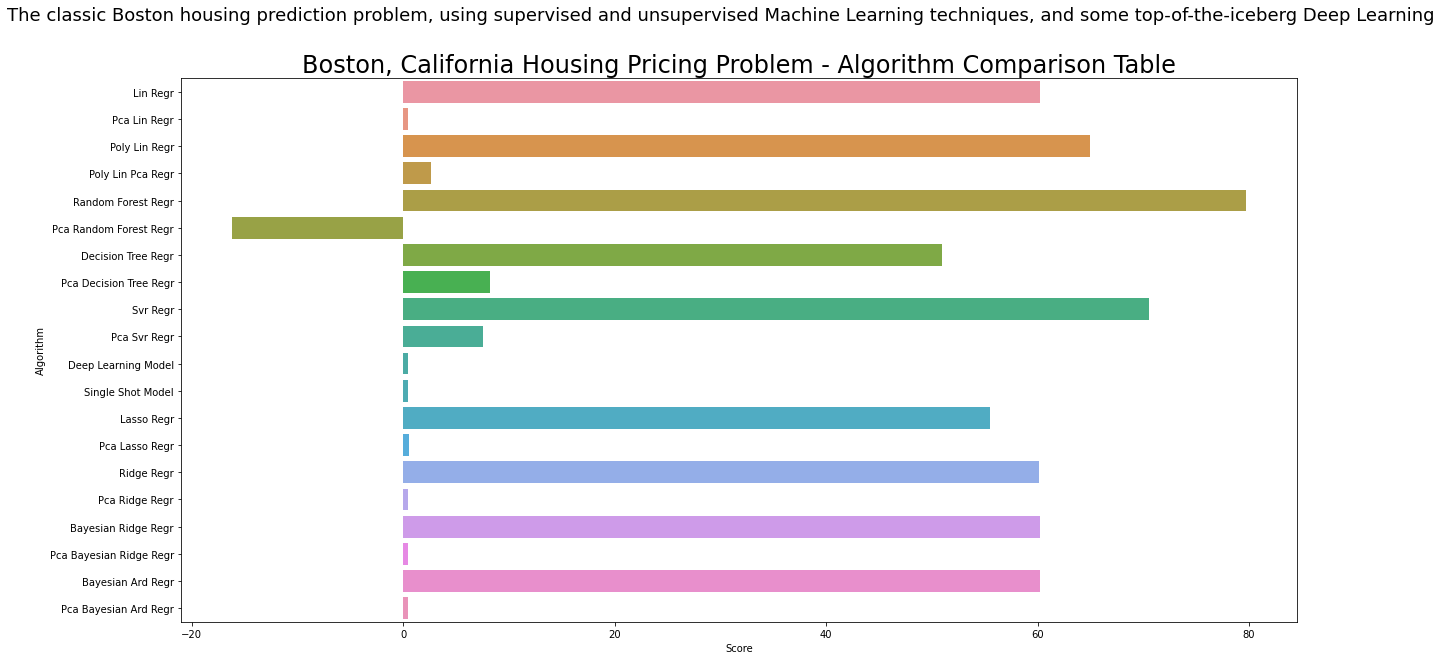

In [790]:
plt.figure(figsize=(20,10))
plt.title(
  'Boston, California Housing Pricing Problem - Algorithm Comparison Table',
  fontsize=24
)
plt.suptitle(
  'The classic Boston housing prediction problem, using supervised and unsupervised Machine Learning techniques, and some top-of-the-iceberg Deep Learning',
  fontsize=18
)
sns.barplot(data=df_scores_comparison, x='Score', y='Algorithm')

And a grid view, it's just a matter of preference, as per the configuration, check the source,

source: 

In [791]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_scores_comparison)

Algorithm      Score          Type
0                  Lin Regr  60.220000    Supervised
1              Pca Lin Regr   0.410000    Supervised
2             Poly Lin Regr  64.930000    Supervised
3         Poly Lin Pca Regr   2.670000    Supervised
4        Random Forest Regr  79.740000  Unsupervised
5    Pca Random Forest Regr -16.230000  Unsupervised
6        Decision Tree Regr  50.980000    Supervised
7    Pca Decision Tree Regr   8.190000    Supervised
8                  Svr Regr  70.510000    Supervised
9              Pca Svr Regr   7.570000    Supervised
10      Deep Learning Model   0.467614  Unsupervised
11        Single Shot Model   0.434064  Unsupervised
12               Lasso Regr  55.490000  Unsupervised
13           Pca Lasso Regr   0.520000  Unsupervised
14               Ridge Regr  60.140000    Supervised
15           Pca Ridge Regr   0.420000    Supervised
16      Bayesian Ridge Regr  60.220000    Supervised
17  Pca Bayesian Ridge Regr   0.420000    Supervised
18        Bayesian Ard Regr  60.220000    Supervised
19    Pca Bayesian Ard Regr   0.420000    Supervised

## Interaction

### Imports

In [726]:
import joblib

### Pipeline

We'll use `RandomForest`, just as an example, but we could use, just as much, `LinearRegression` with `PolynomialFeatures`, since it's suprvised and also provides a great score.

But if we were to use the highest score using a supervised technique. `Support Vector Machine Regressor` would be the way to go.

In [695]:
minmax_scaler = MinMaxScaler()

regr = make_pipeline(
  minmax_scaler,
  RandomForestRegressor(
    n_estimators=25,
    max_depth=25,
  ),
)
regr

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=25, n_estimators=25))])

And we train it

In [696]:
regr.fit(df_train[INDEPENDANT_VARIABLES], df_train[DEPENDANT_VARIABLE])
regr.score(df_test[INDEPENDANT_VARIABLES], df_test[DEPENDANT_VARIABLE])

0.8035013663832946

### User interaction

Let's check all the columns that we don't have left on our unnormalized DataFrame

In [ ]:
[ col for col in list(df_train.columns) if col not in list(set(df_train.columns) & set(X_train.columns)) ]

Example of the values in the dataset

In [ ]:
df_train[:1]

Prepare the example to evaluate

In [ ]:
df_exameple = pd.DataFrame([
  {
    'longitude': -114.31,
    'latitude': 34.19,
    'housing_median_age': 15.0,
    'total_rooms': 5612.0,
    'total_bedrooms': 1283.0,
    'population': 1015.0,
    'households': 472.0,
    'median_income': 1_4936,
  },
])

example_index = 0
df_example = df_train[example_index:example_index+1][INDEPENDANT_VARIABLES]
df_example_y = df_train[example_index:example_index+1][DEPENDANT_VARIABLE]

And evaluate it!

In [ ]:
example_prediction = regr.predict(df_example)
example_prediction

# example_prediction * (df_max[DEPENDANT_VARIABLE] + df_min[DEPENDANT_VARIABLE]) + df_min[DEPENDANT_VARIABLE]

# regr['minmaxscaler'].inverse_transform([
  # [*df_exameple.values[0], example_prediction[0],]
# ])
# [*df_exameple.values[0], example_prediction[0],]
example_prediction[0], df_example_y.values[0]

### Saving and Loading the model

In [730]:
MODEL_FILENAME = 'random-forest-model.pkl' #@param {type:'string'}

Save the model

In [729]:
joblib.dump(regr, MODEL_FILENAME, compress=1)

['random-forest-model.pkl']

Load the model

In [733]:
loaded_model = joblib.load(MODEL_FILENAME)
loaded_model_score = loaded_model.score(df_test[INDEPENDANT_VARIABLES], df_test[DEPENDANT_VARIABLE])
format_score(loaded_model_score)

'80.35%'

## Conclusions

The Median House Value is a variable that's not that easy to predict, it isn't incredibly hard, but, I think that more fields would be a great addition, fields such as:

- Near hospitals
- Near colleges
- Windows
- Close beaches
- Close mountains
- Squared meters
- Bathrooms
- Kitchens

And plenty more options...

But, concluded with the data, a general conclusion would be that the surrounding of the house matters more than the house itself, the location and how much money do the neighboors have it's what is making the actual housing price itself in this dataset.

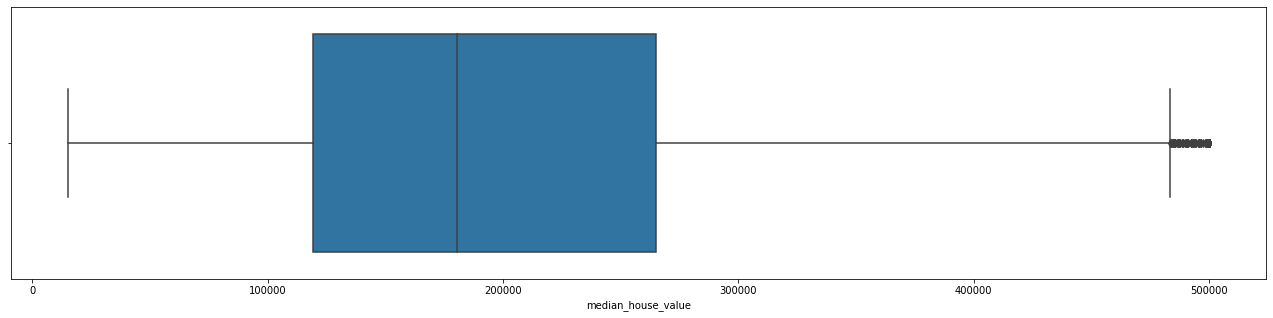

In [794]:
plt.figure(figsize=(22.5, 5))
sns.boxplot(x=df_train[DEPENDANT_VARIABLE])

And that most of the houses are on the cheaper side of the spectrum, which makes sense.

In [755]:
THRESHHOLD = df_train[DEPENDANT_VARIABLE].mean()
cheap_houses = df_train[ df_train[DEPENDANT_VARIABLE] < THRESHHOLD ]
expensive_houses = df_train[ df_train[DEPENDANT_VARIABLE] >= THRESHHOLD ]

print('With a threshhold of', THRESHHOLD)
len(cheap_houses), len(expensive_houses)

With a threshhold of 207300.91235294117


(10109, 6891)

Another conclusion, is that of the location, there's a correlation between the location and the housing price, it also makes sense.

Even though there seemed to be no mathemathic correlation, "domain knowledged" would say that the location is one of the key features to predict the house value

Text(0.5, 1.0, 'Latitude')

<Figure size 1440x720 with 0 Axes>

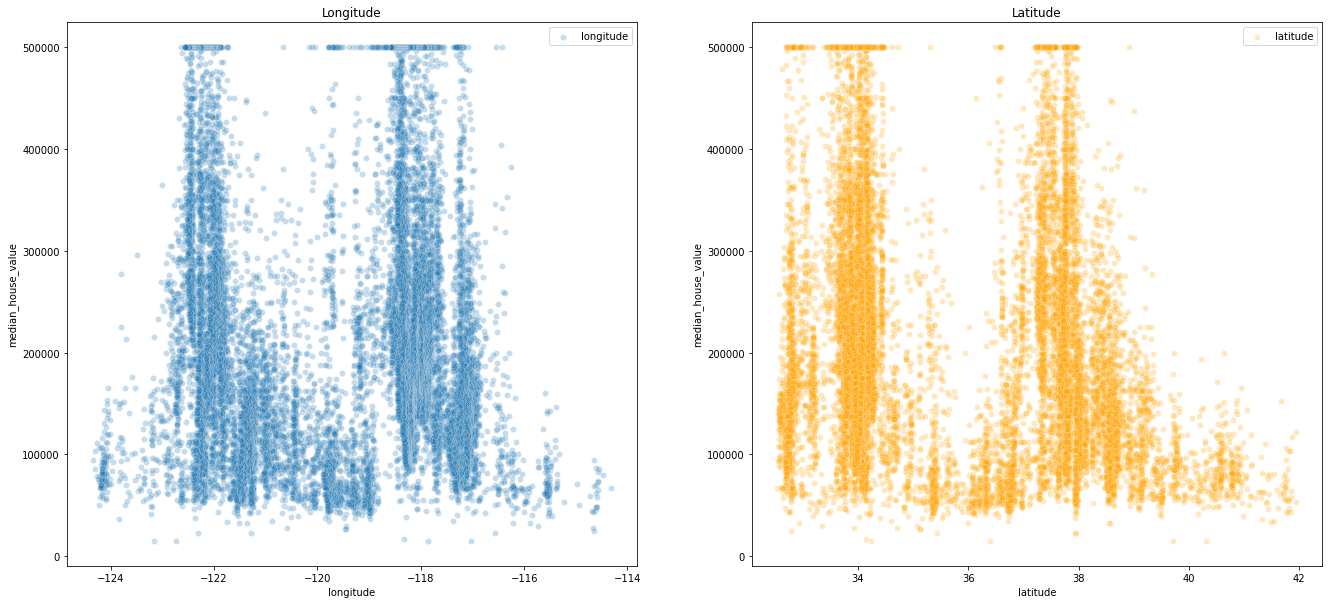

In [770]:
plt.figure(figsize=(20,10))
temp_df = X_train

fig, axes = plt.subplots(1, 2, figsize=(22.5,10))

fig1 = sns.scatterplot(
  x=df_train['longitude'],
  y=df_train[DEPENDANT_VARIABLE],
  alpha=.25,
  label='longitude',
  ax=axes[0]
)
fig1.set_title('Longitude')

fig2=sns.scatterplot(
  x=df_train['latitude'],
  y=df_train[DEPENDANT_VARIABLE],
  alpha=.25,
  label='latitude',
  ax=axes[1],
  color='orange'
)
fig2.set_title('Latitude')

### An adequate model

We could even have a decent Machine Learning model just using `median_income`, `longitude`, `latitude`

Let's select only those features

In [725]:
most_important_features = ['median_income', 'longitude', 'latitude']

# training set
X_train_example = df_train[ most_important_features ]
y_train_example = df_train[ DEPENDANT_VARIABLE ]

# production set
X_test_example = df_test[ most_important_features ]
y_test_example = df_test[ DEPENDANT_VARIABLE ]

Make the pipeline with the same configuration once again

In [801]:
example_regr = make_pipeline(
  MinMaxScaler(),
  RandomForestRegressor(
    n_estimators=25,
    max_depth=25,
  ),
  # PolynomialFeatures(2),
  # LinearRegression()
)

Fit and score

In [802]:
example_regr.fit(X_train_example, y_train_example)
example_score = example_regr.score(X_test_example, y_test_example)
format_score(example_score)

'81.16%'

Voilà! We have an even higher score!

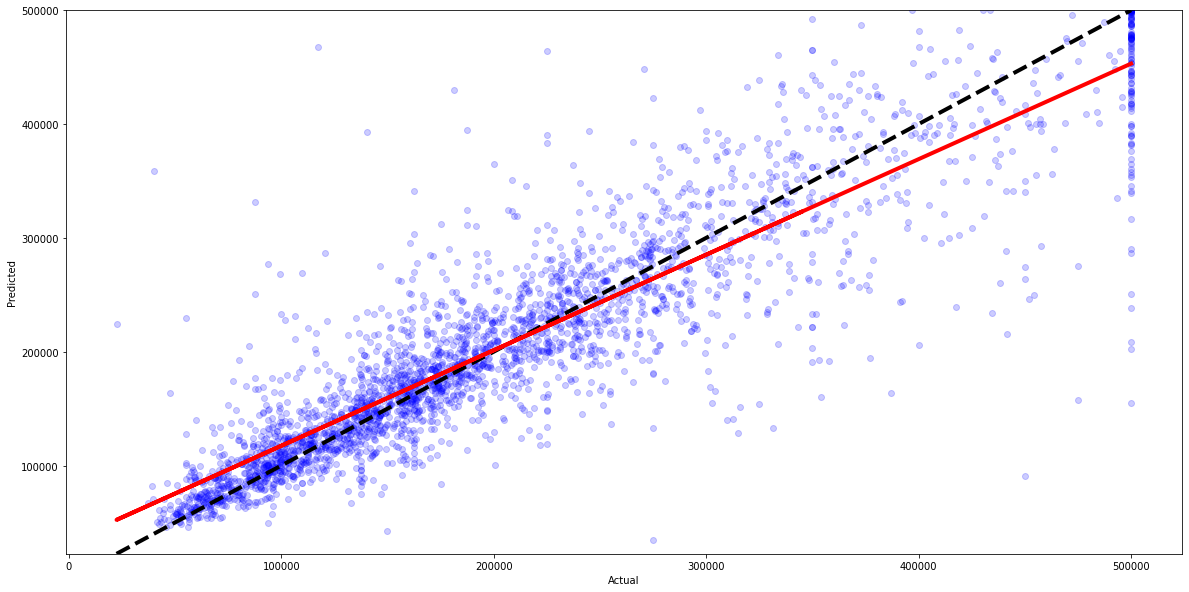

In [803]:
plot_regression(
  model=example_regr,
  base_model=LinearRegression,
  y_true=y_test_example,
  X_true=X_test_example,
  y_lim_min=y_test_example.min(),
  y_lim_max=y_test_example.max(),
)